<a href="https://colab.research.google.com/github/nyp-sit/sdaai-pdc1-students/blob/master/ml-essentials/assignments/ml_assignment1_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing
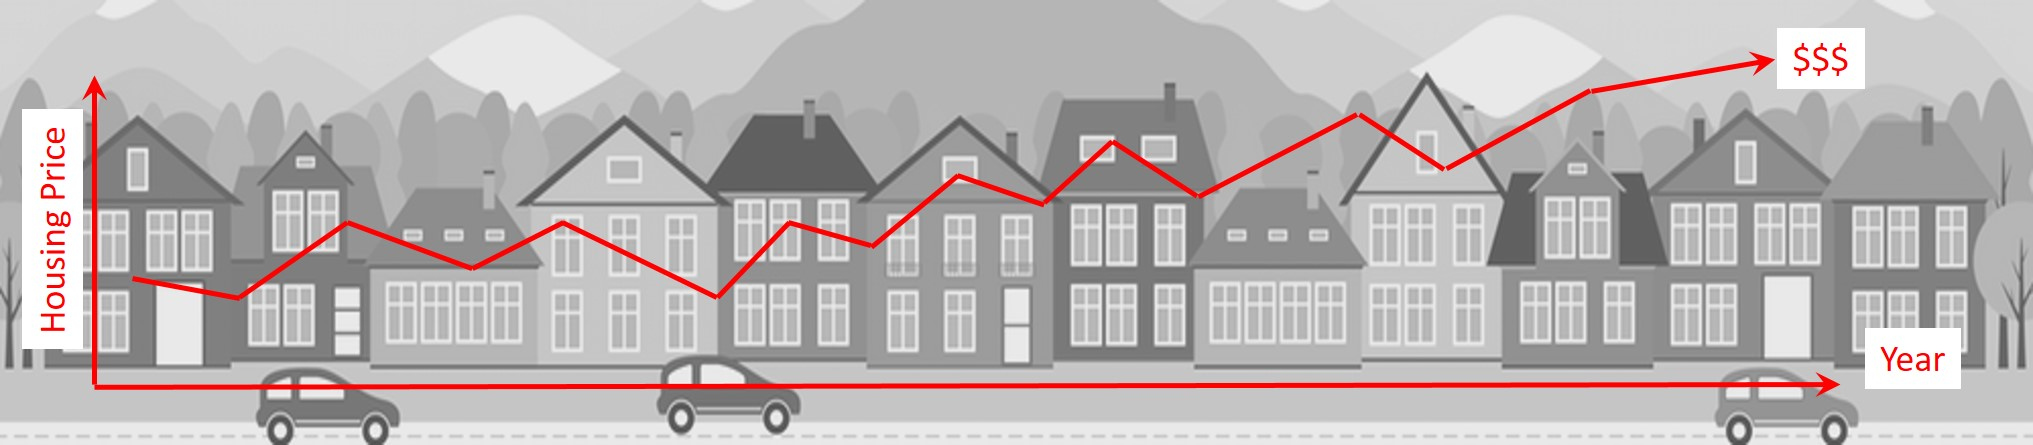
# Overview
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this kaggle's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset can be use to create a ML model for prediction of the final price of each home.

## Dataset

The kaggle data set is based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It is a modernized alternative to the well-known Boston Housing dataset. 
For a detailed description of each field (feature), you can refer to the following [file](data/data_description.txt)


## Questions of Interest
1) What are the top associated and non-associated features of housing attributes with the pricing of Boston houses? 

2) Explore the top associated features of housing attributes with the pricing of Boston houses in plots.

3) Explore the top non-associated features of housing attributes with the pricing of Boston houses in plots.

4) For housings in the 3 categories (low, medium, high) of pricing, do they still exhibit the same relationship for the top features associated?


In [1]:
#Import library packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the data using the file path
data = pd.read_csv('data/data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# examine the shape 
data.shape

(1460, 81)

In [4]:
# Display value counts of each data type
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
#Check target(sale price) stats
data.SalePrice = data.SalePrice.astype(int)
print(data.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


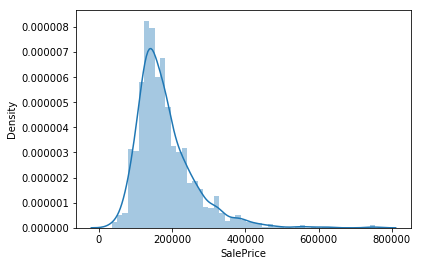

In [6]:
#Plot sale price distributions
sns.distplot(data.SalePrice)

In [7]:
#Check for incomplete row
incomplete_row = data[data.isnull().any(axis=1)]
print('Total number of rows: {}'.format(len(data)))
print('Number of rows with missing data: {}'.format(len(incomplete_row)))

Total number of rows: 1460
Number of rows with missing data: 1460


Every row has at least a column with missing data.

In [8]:
#Find a set of columns with 0 missing values.
no_nulls = set(data.columns[data.isnull().mean()==0])
print(no_nulls)

{'LandContour', 'WoodDeckSF', 'GarageCars', 'GarageArea', 'FullBath', 'MoSold', 'LotArea', 'OverallCond', 'Id', 'Condition2', 'OverallQual', 'LandSlope', 'Street', 'Exterior1st', 'MSSubClass', 'LotShape', 'BsmtFinSF1', 'Fireplaces', '3SsnPorch', 'SaleType', 'LotConfig', 'OpenPorchSF', 'BsmtUnfSF', 'Neighborhood', 'BsmtFullBath', 'BedroomAbvGr', 'TotalBsmtSF', 'YearBuilt', 'PavedDrive', 'BldgType', 'Exterior2nd', 'MiscVal', 'ExterQual', 'HalfBath', 'RoofStyle', 'Functional', 'MSZoning', '1stFlrSF', 'RoofMatl', 'ExterCond', 'HeatingQC', 'ScreenPorch', 'BsmtFinSF2', 'Foundation', 'TotRmsAbvGrd', 'KitchenQual', 'LowQualFinSF', 'Utilities', 'GrLivArea', 'BsmtHalfBath', '2ndFlrSF', 'PoolArea', 'SaleCondition', 'HouseStyle', 'EnclosedPorch', 'KitchenAbvGr', 'YrSold', 'SalePrice', 'CentralAir', 'Condition1', 'Heating', 'YearRemodAdd'}


In [9]:
#Find a set of columns with missing values.
with_nulls = set(data.columns[data.isnull().mean()!=0])
print(with_nulls)

{'BsmtExposure', 'GarageYrBlt', 'BsmtFinType2', 'BsmtFinType1', 'GarageType', 'Fence', 'MasVnrArea', 'MasVnrType', 'BsmtQual', 'Electrical', 'FireplaceQu', 'PoolQC', 'GarageQual', 'MiscFeature', 'LotFrontage', 'Alley', 'BsmtCond', 'GarageFinish', 'GarageCond'}


In [10]:
#Find number of missing values in columns
data[with_nulls].isnull().sum()

BsmtExposure      38
GarageYrBlt       81
BsmtFinType2      38
BsmtFinType1      37
GarageType        81
Fence           1179
MasVnrArea         8
MasVnrType         8
BsmtQual          37
Electrical         1
FireplaceQu      690
PoolQC          1453
GarageQual        81
MiscFeature     1406
LotFrontage      259
Alley           1369
BsmtCond          37
GarageFinish      81
GarageCond        81
dtype: int64

Dealing with missing values:
1. Drop columns with more than 75% missing values.
2. Impute value for numerical columns with missing values.
3. Drop rows with missing values.

In [11]:
#Find a set of columns with more than 75% of the values missing
most_missing_cols = set(data.columns[data.isnull().mean() > 0.75])
print(most_missing_cols)

{'Alley', 'Fence', 'MiscFeature', 'PoolQC'}


In [12]:
#Check data types of columns with missing values
data[with_nulls].dtypes

BsmtExposure     object
GarageYrBlt     float64
BsmtFinType2     object
BsmtFinType1     object
GarageType       object
Fence            object
MasVnrArea      float64
MasVnrType       object
BsmtQual         object
Electrical       object
FireplaceQu      object
PoolQC           object
GarageQual       object
MiscFeature      object
LotFrontage     float64
Alley            object
BsmtCond         object
GarageFinish     object
GarageCond       object
dtype: object

In [13]:
#Find numberical columns with missing data
mask = data[with_nulls].dtypes != np.object
mask = mask[mask.values==True].index
data_missing = data[mask]
data_missing.head()

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,GarageYrBlt,MasVnrArea,LotFrontage
0,2003.0,196.0,65.0
1,1976.0,0.0,80.0
2,2001.0,162.0,68.0
3,1998.0,0.0,60.0
4,2000.0,350.0,84.0


In [14]:
#Check number of missing value in each numerical columns
data_missing.isnull().sum()

GarageYrBlt     81
MasVnrArea       8
LotFrontage    259
dtype: int64

In [15]:
#Check value distribution in each numberical column with missing values
for col in data_missing.columns:
    print('Column {}:'.format(col))
    print(data_missing[col].describe())
    print('\n')

Column GarageYrBlt:
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


Column MasVnrArea:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Column LotFrontage:
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64




Impute method:
1. Columns with low std: Replace missing values with mean for columns GarageYrBlt and LotFrontage.
2. Columns with high std: Replace missing values with median for column MasVnrArea.

In [16]:
fill_mean = lambda col: col.fillna(col.mean())
fill_median = lambda col: col.fillna(col.median())
data_missing[['GarageYrBlt', 'LotFrontage']] = data_missing[['GarageYrBlt', 'LotFrontage']].apply(fill_mean, axis=0)
data_missing[['MasVnrArea']] = data_missing[['MasVnrArea']].apply(fill_median, axis=0)

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [17]:
#Generate new data
#Drop columns with more than 75% of the values missing and impute values columns
df = data.drop(columns = most_missing_cols.union(data_missing.columns))
#Concate columns with impute values
df = pd.concat([df,data_missing],axis=1)
#Drop rows with missing values
df = df.dropna(axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt,MasVnrArea,LotFrontage
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,2003.0,196.0,65.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,1976.0,0.0,80.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,2001.0,162.0,68.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,1998.0,0.0,60.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,2000.0,350.0,84.0


In [18]:
#Confirm no rows with null value
df[df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt,MasVnrArea,LotFrontage


C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

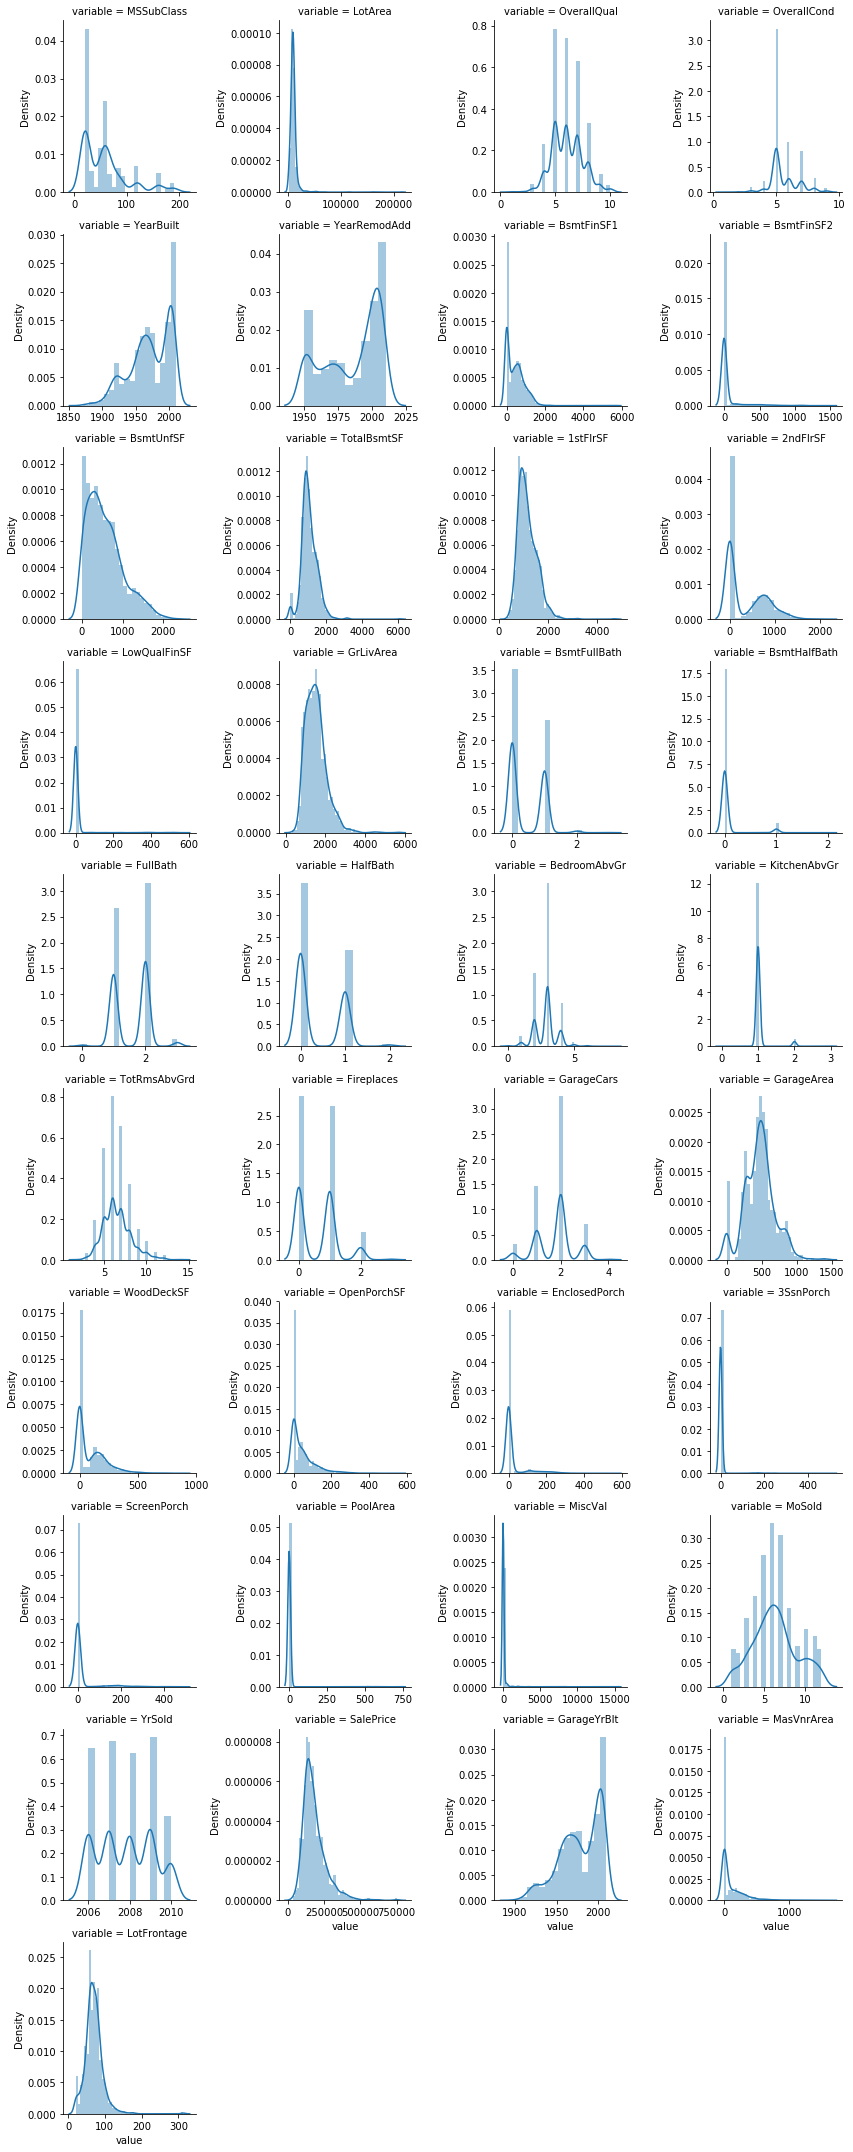

In [19]:
#create numeric plots
mask = df.dtypes != np.object
numeric_cols = df.columns[mask]
numeric_cols = numeric_cols.drop('Id')
plot_data = pd.melt(data[numeric_cols], value_vars = numeric_cols)
plot = sns.FacetGrid(plot_data, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
plot
#Distribution of Numberic Features are skewed. Need to apply log transformation.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


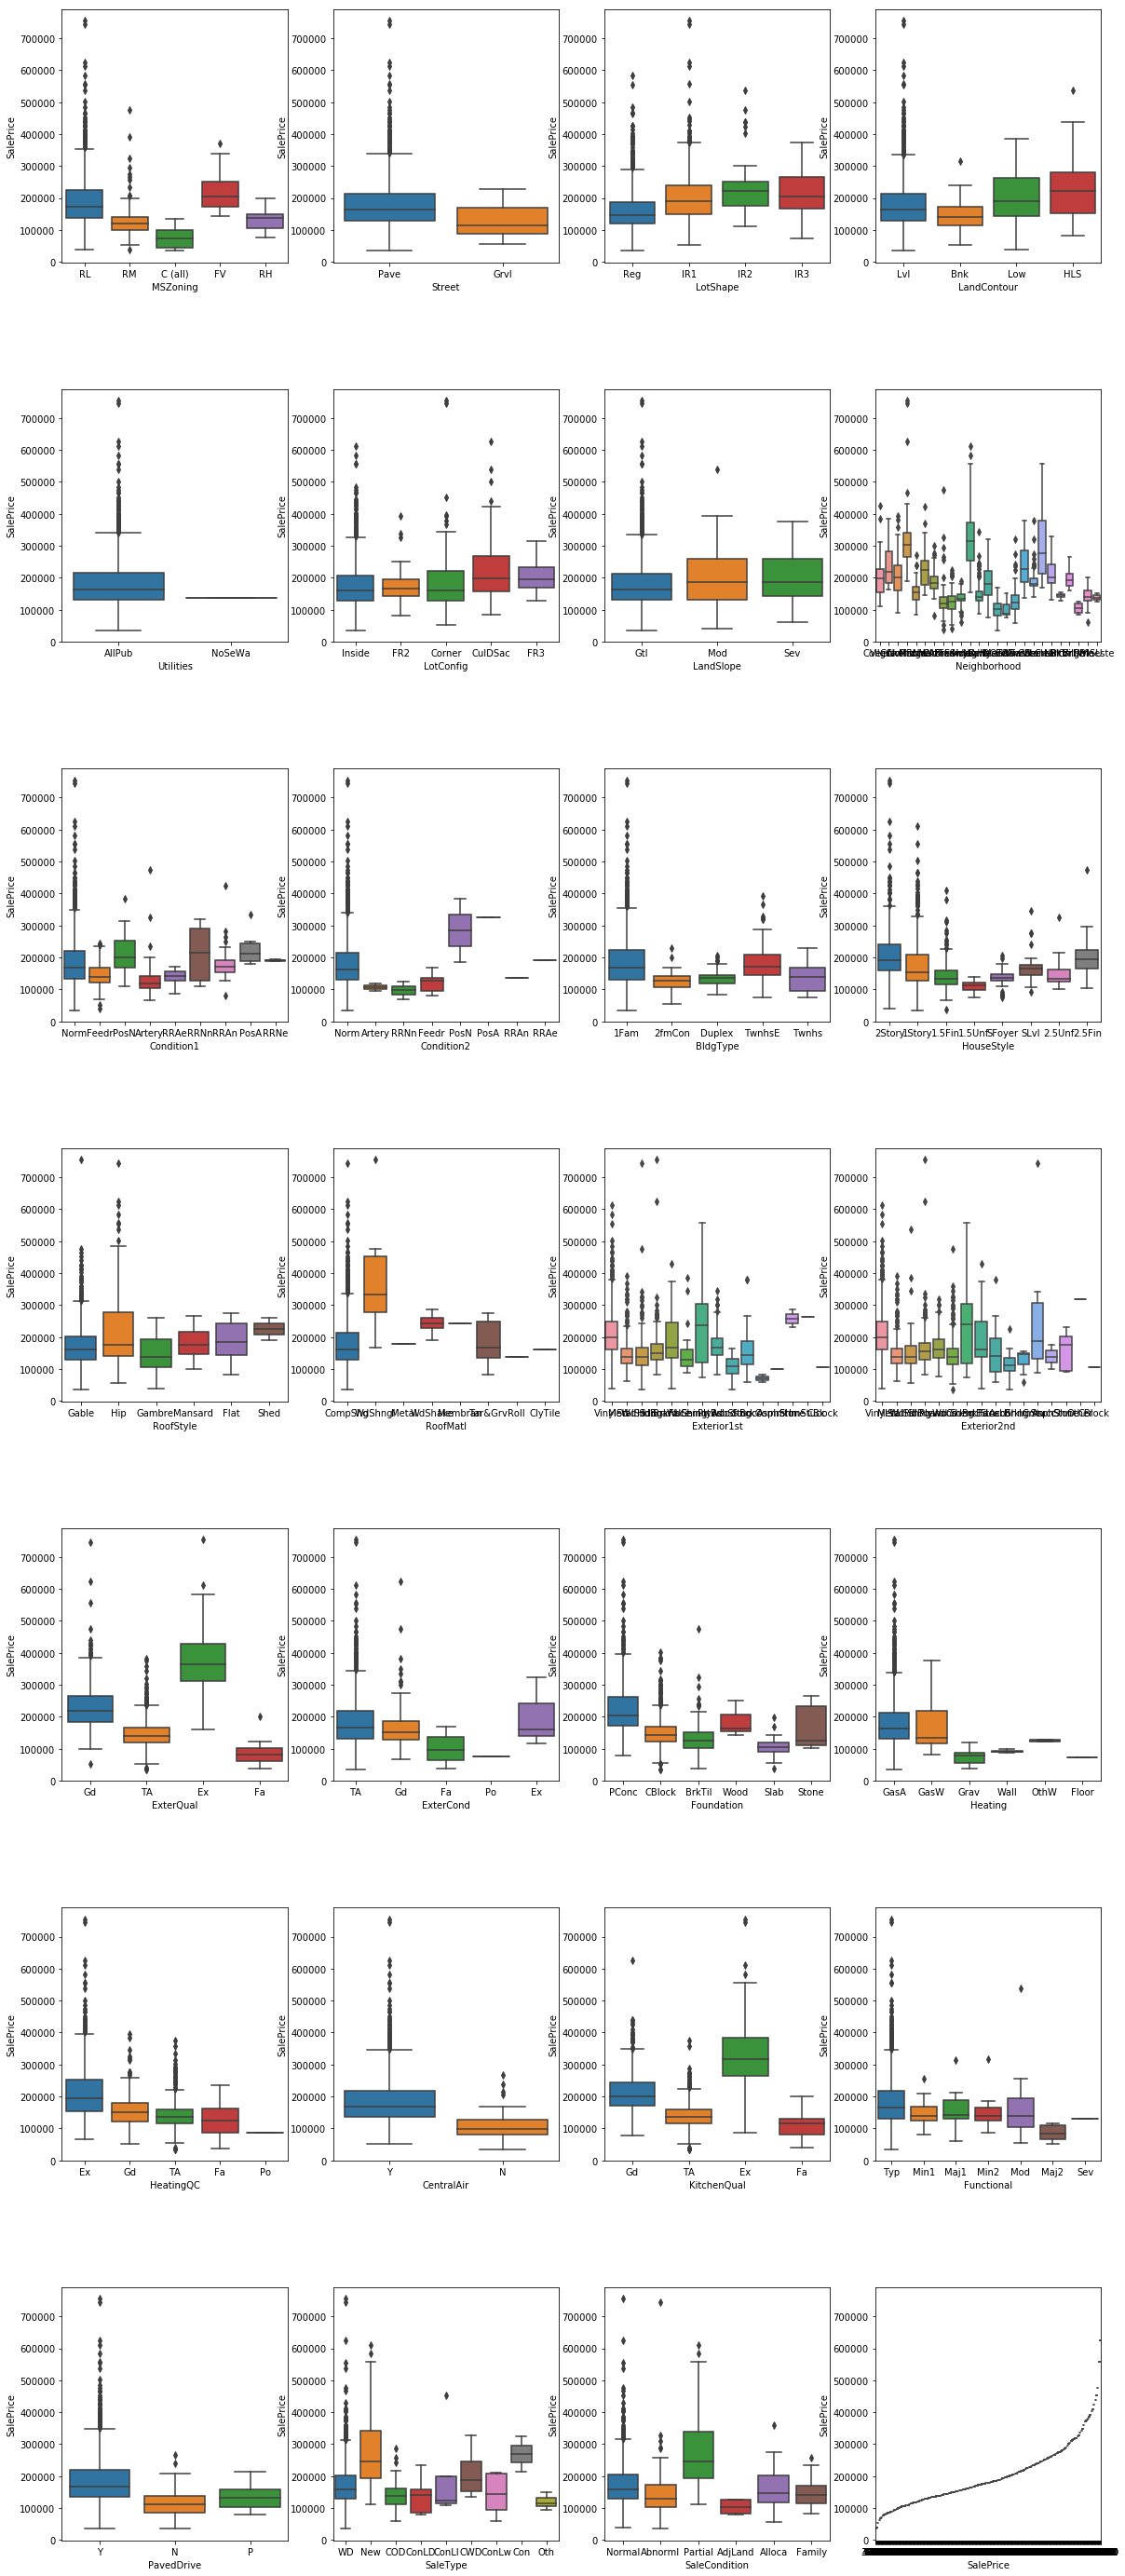

In [20]:
#create categorical plots
mask = df.dtypes == np.object
categorical_cols = df.columns[mask].to_list()
plot_col = categorical_cols
plot_col.append('SalePrice')
p_df = df[plot_col]

fig, axes = plt.subplots(7, 4, figsize=(20,50))
fig.subplots_adjust(hspace=0.5)

for ax, feature in zip(axes.flatten(), plot_col):
    sns.boxplot(x=p_df[feature], y=p_df['SalePrice'],  orient='v', ax=ax)

Check correlation of numerical features with target:
* Extract dataframe numerical columns and target column
* Perform correlation
* Plot barplot with respective feature correlation values

In [21]:
df_num = df[numeric_cols]
df_corr = pd.concat([df_num], axis=1)
corr = df_corr.corr()
corr_SalePrice = corr.SalePrice
corr_SalePrice = corr_SalePrice.abs()
corr_SalePrice = corr_SalePrice.drop(index='SalePrice')
corr_SalePrice = corr_SalePrice.reset_index()
corr_SalePrice.rename(columns={'index':'features','SalePrice':'correlation'},inplace=True)
corr_SalePrice.sort_values(by='correlation', ascending=False, inplace=True)

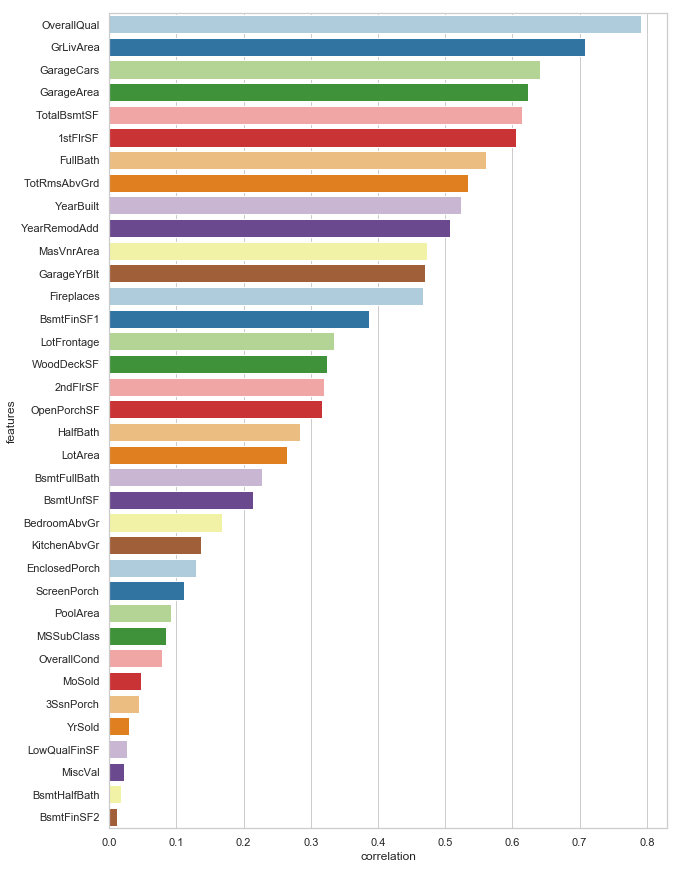

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 15))
sns.barplot(y=corr_SalePrice['features'], x=corr_SalePrice['correlation'], palette="Paired", orient='h')

##### Perform analysis on the data with categorical features:
* Plot count plots of categorical data.
* Check correlation of categorical features with target.

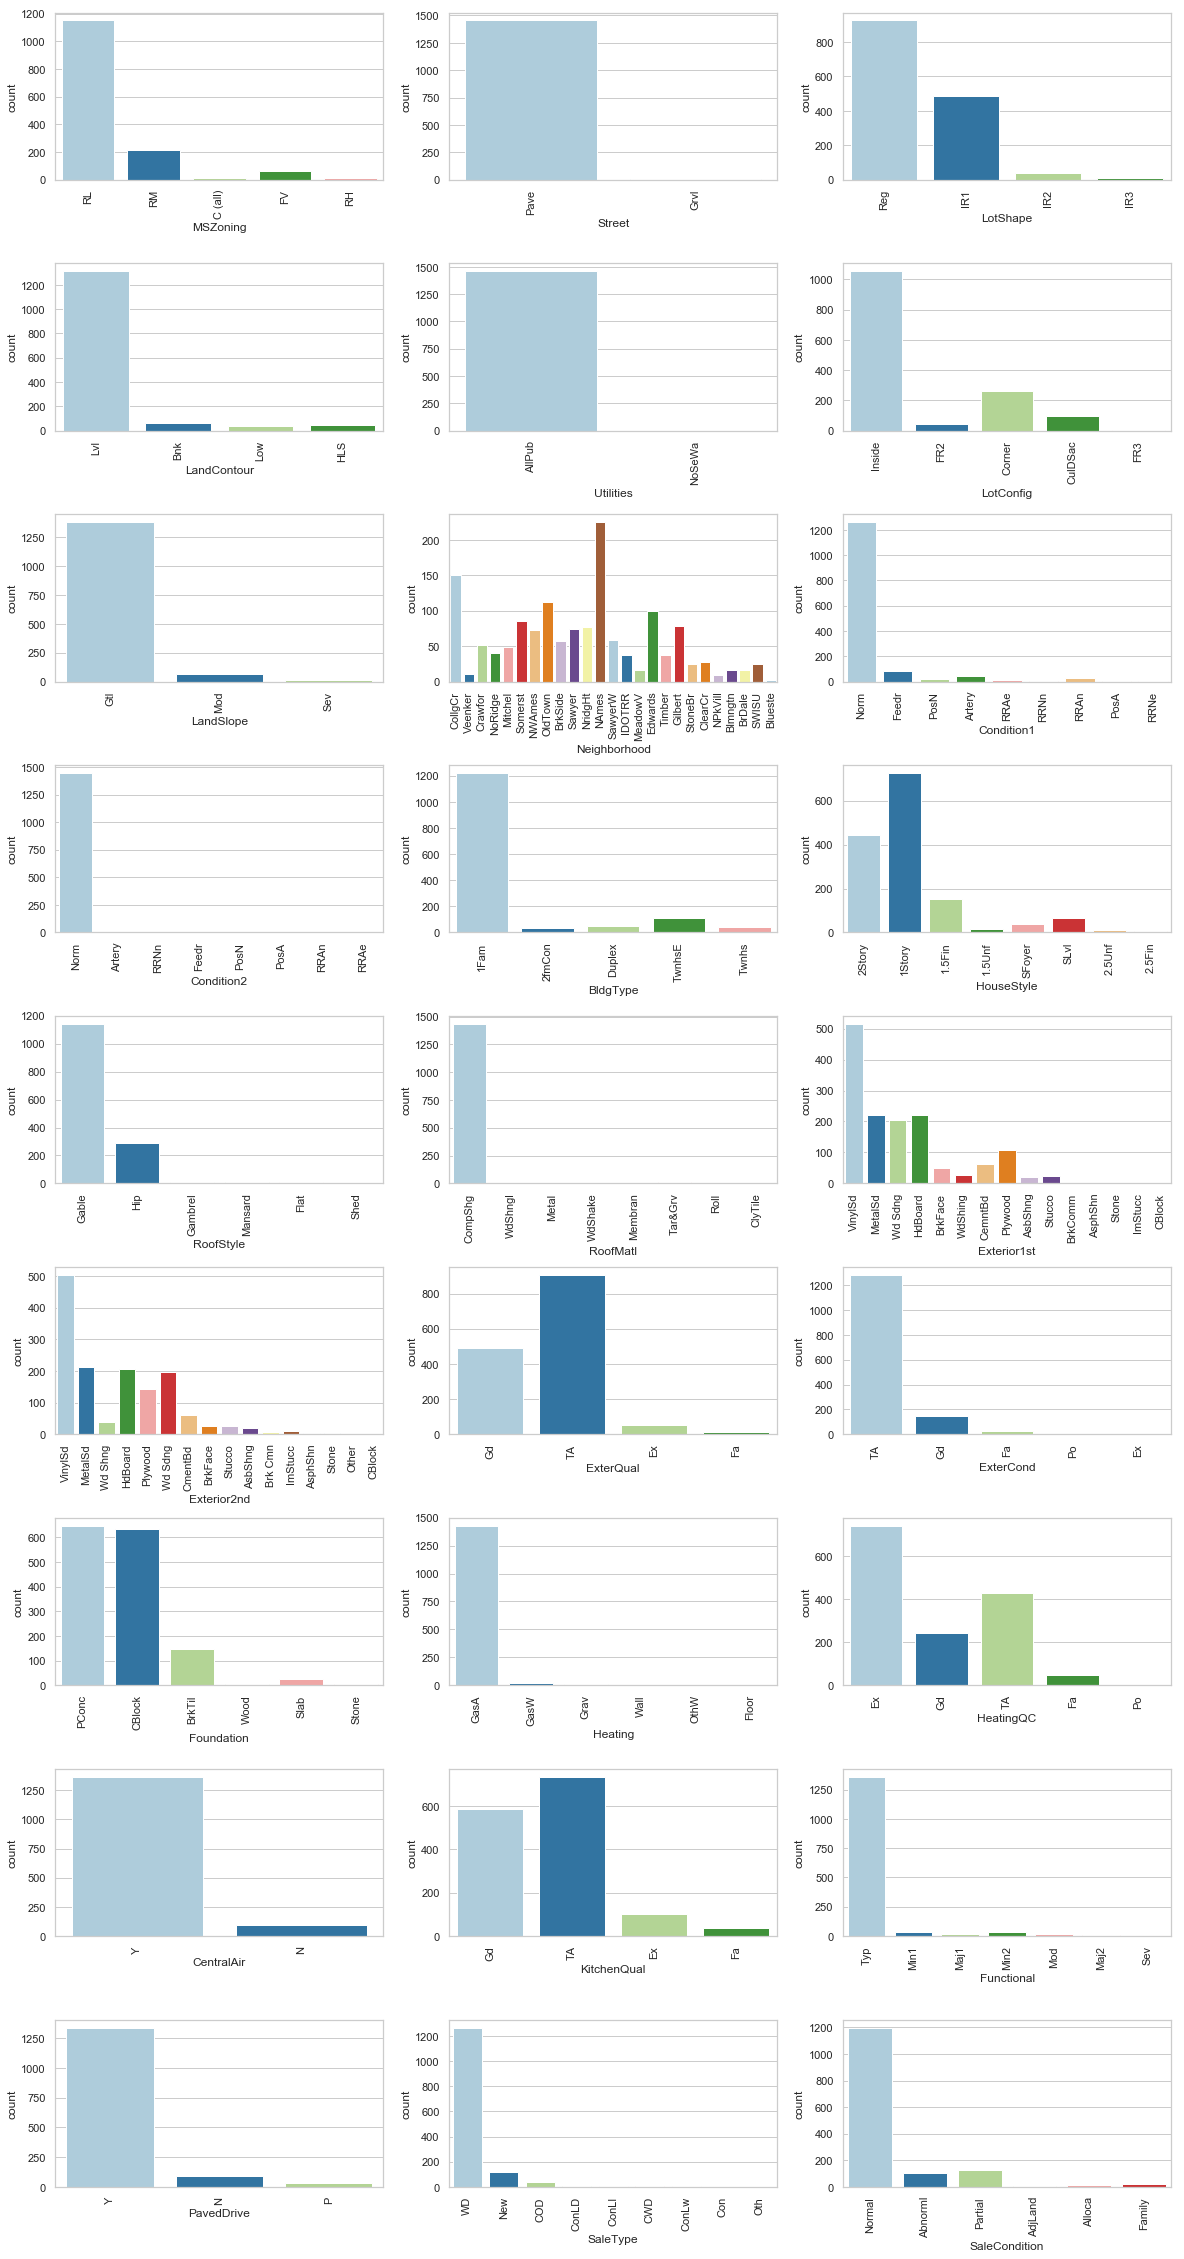

In [23]:
df_cat = df[categorical_cols]
fig, axes = plt.subplots(9, 3, figsize=(20,40))
fig.subplots_adjust(hspace=0.5)
rotation = 90
for i, ax in enumerate(fig.axes):
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
for ax, feature in zip(axes.flatten(), categorical_cols):
    sns.countplot(x=df[feature], ax=ax, palette="Paired")

Check correlation of categorical features with target:
* Create a function to generate individual categorical feature with one hot encoded columns and target column
* Perform correlation for each feature
* Plot barplot with respective feature correlation values

In [24]:
def genCorr(feature):
    data_cat = df[feature]
    df_cat = pd.get_dummies(data_cat)
    data_pred = pd.concat([df_cat, df.SalePrice], axis=1)
    #data_pred.target.replace({' <=50K':0, ' >50K':1},inplace=True) 
    corr = data_pred.corr()
    corr_target = corr.SalePrice
    corr_target = corr_target.abs()
    corr_target.sort_values(ascending=False,inplace=True)  
    corr_target = corr_target.drop(index='SalePrice')
    corr_target.sort_index(inplace=True)
    corr_target = corr_target.reset_index()
    corr_target.rename(columns={'index':feature,'SalePrice':'correlation'},inplace=True)
    return corr_target

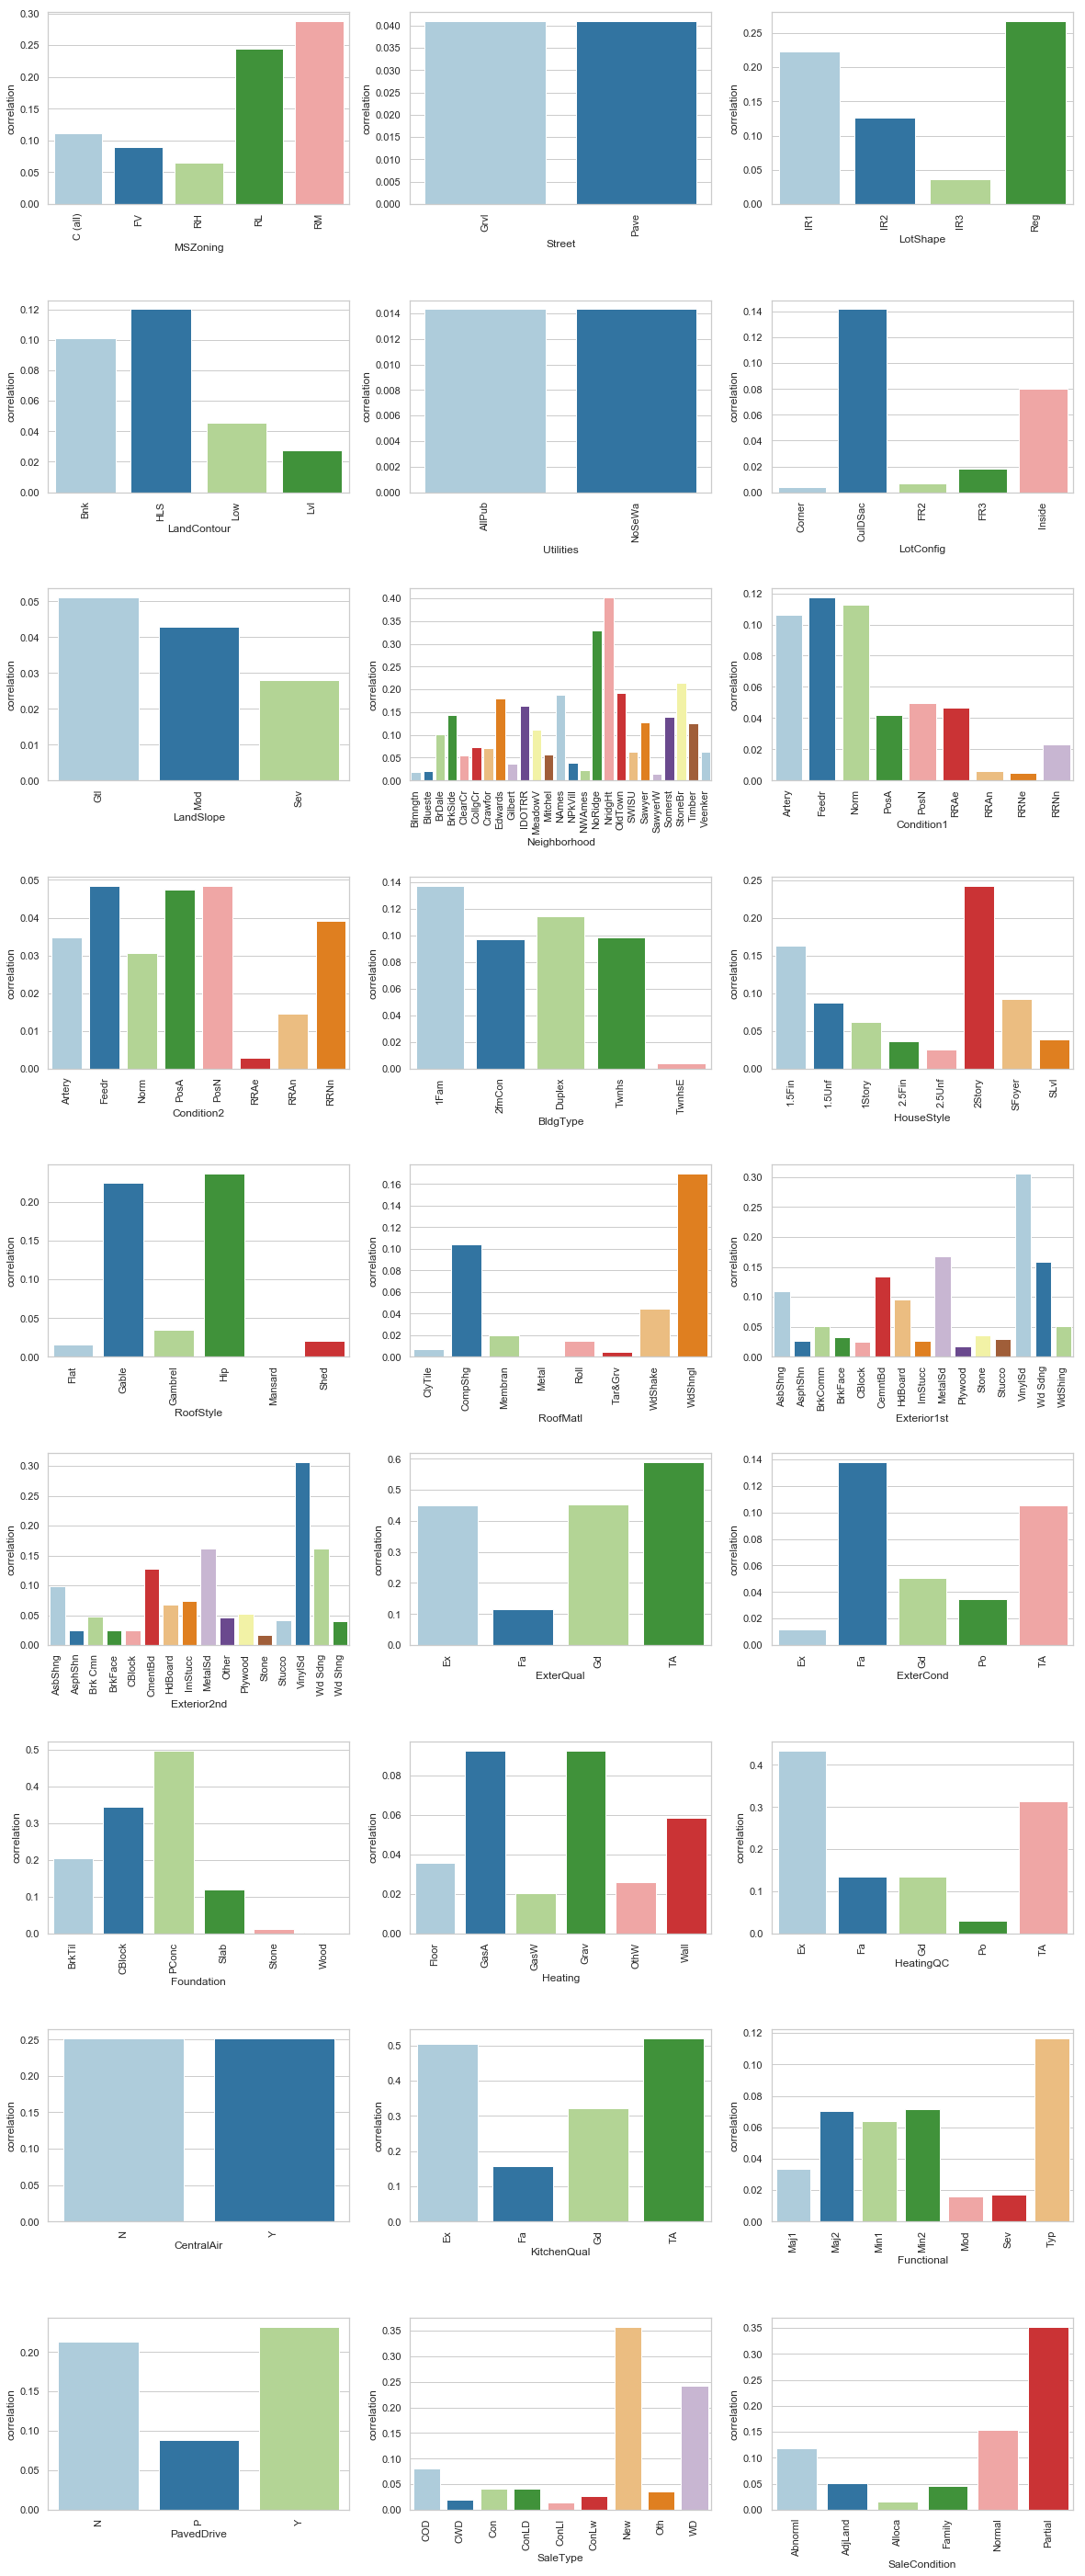

In [25]:
fig, axes = plt.subplots(9, 3, figsize=(20,50))
fig.subplots_adjust(hspace=0.5)
rotation = 90
for i, ax in enumerate(fig.axes):   
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
for ax, feature in zip(axes.flatten(), categorical_cols[:-1]):
    sns.barplot(x=genCorr(feature)[feature], y=genCorr(feature)['correlation'], ax=ax, palette="Paired")

Filter top categorical and numerical features with at least 0.3 correlation with sale price.

In [26]:
#Extract top associated categorical features with correlation to sale price. 
top_features = corr_SalePrice[corr_SalePrice.correlation>0.3].features.to_list()

In [27]:
#Extract top numerical features with correlation to sale price. 
for feature in categorical_cols[:-1]:
    corr = genCorr(feature)
    corr_max = corr.correlation.max()
    if corr_max>=0.3:
        top_features.append(feature)
    else:
        pass
        

In [28]:
print('Features with more than 0.3 correlation with sale price are: {}'.format(top_features))

Features with more than 0.3 correlation with sale price are: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'KitchenQual', 'SaleType', 'SaleCondition']


In [29]:
#Extract non-associated categorical features with correlation to sale price. 
bottom_features = corr_SalePrice.sort_values(by='correlation',ascending=True)[corr_SalePrice.correlation<0.3].features.to_list()
#Extract top non associated numerical features with correlation to sale price. 
for feature in categorical_cols[:-1]:
    corr = genCorr(feature)
    corr_max = corr.correlation.max()
    if corr_max<0.3:
        bottom_features.append(feature)
    else:
        pass

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
print('Features with less than 0.3 correlation with sale price are: {}'.format(bottom_features))

Features with less than 0.3 correlation with sale price are: ['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', '3SsnPorch', 'MoSold', 'OverallCond', 'MSSubClass', 'PoolArea', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BedroomAbvGr', 'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterCond', 'Heating', 'CentralAir', 'Functional', 'PavedDrive']


## Q1: What are the top associated and non-associated features of housing attributes with the pricing of Boston houses? 

Top associated attributes with housing pricing are: 
- OverallQual: Rates the overall material and finish of the house.
- GrLivArea: Above grade (ground) living area square feet.
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- TotalBsmtSF: Total square feet of basement area.

Top non-associated attributes with housing pricing are: 
- BsmtFinSF2: Type 2 finished square feet.
- BsmtHalfBath: Basement half bathrooms.
- MiscVal: Value of miscellaneous feature.
- LowQualFinSF: Low quality finished square feet (all floors).
- YrSold: Year Sold (YYYY).

In [31]:
#Generate function to bin housing attributes for plots
def fillbin(value,bins):
    for bin in bins:
        if value in bin:
            label_bin = bin
        else:
            pass
    return label_bin

#Generate function to explore housing attribute in boxplot and barplot
def genPlot(df,feature,label_rotation,label_size,height,quantile):
    feature_unique = len(df[feature].unique())
    #Generate dataframe break to bins if attribute is numerical and have more than 20 unique values
    if (df[feature].dtypes != np.object) and (feature_unique >= 20):
        df_bar = df.groupby(pd.cut(df[feature], 20)).SalePrice.median()
        bins = df_bar.index.to_list()
        
        df_box = df[[feature,'SalePrice']]
        df_box[feature] = df_box[feature].apply(fillbin, bins=bins)
        df_box.sort_values(feature,inplace=True)        
    
    #Generate dataframe for categorical attributes
    else:
        df_bar = df.groupby(feature).SalePrice.median()
        df_box = df[[feature,'SalePrice']]
    
    #Plot box and bar plot
    sns.set(style="whitegrid")
    #plt.figure(figsize=(10, 5))
    fig, axes = plt.subplots(2, 1, figsize=(25,height))
    fig.subplots_adjust(hspace=0.2)
    sns.boxplot(ax=axes[0], x=df_box[feature], y=df_box["SalePrice"], palette="Paired")
    sns.barplot(ax=axes[1],  x=df_bar.index, y=df_bar.values, palette="Paired")
    #axes[1].set_ylabel('SalePrice')
    axes[0].set_title('SalePrice Vs '+ feature + ' ('+quantile+')', size = 24)
    for i, ax in enumerate(fig.axes):  
        ax.set_ylabel('SalePrice', size=label_size)
        ax.set_xlabel(feature, size=label_size)
        ax.set_yticklabels(ax.get_yticks(), size = label_size)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = label_rotation, size = label_size)

## Q2. Explore the top associated features of housing attributes with the pricing of Boston houses.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


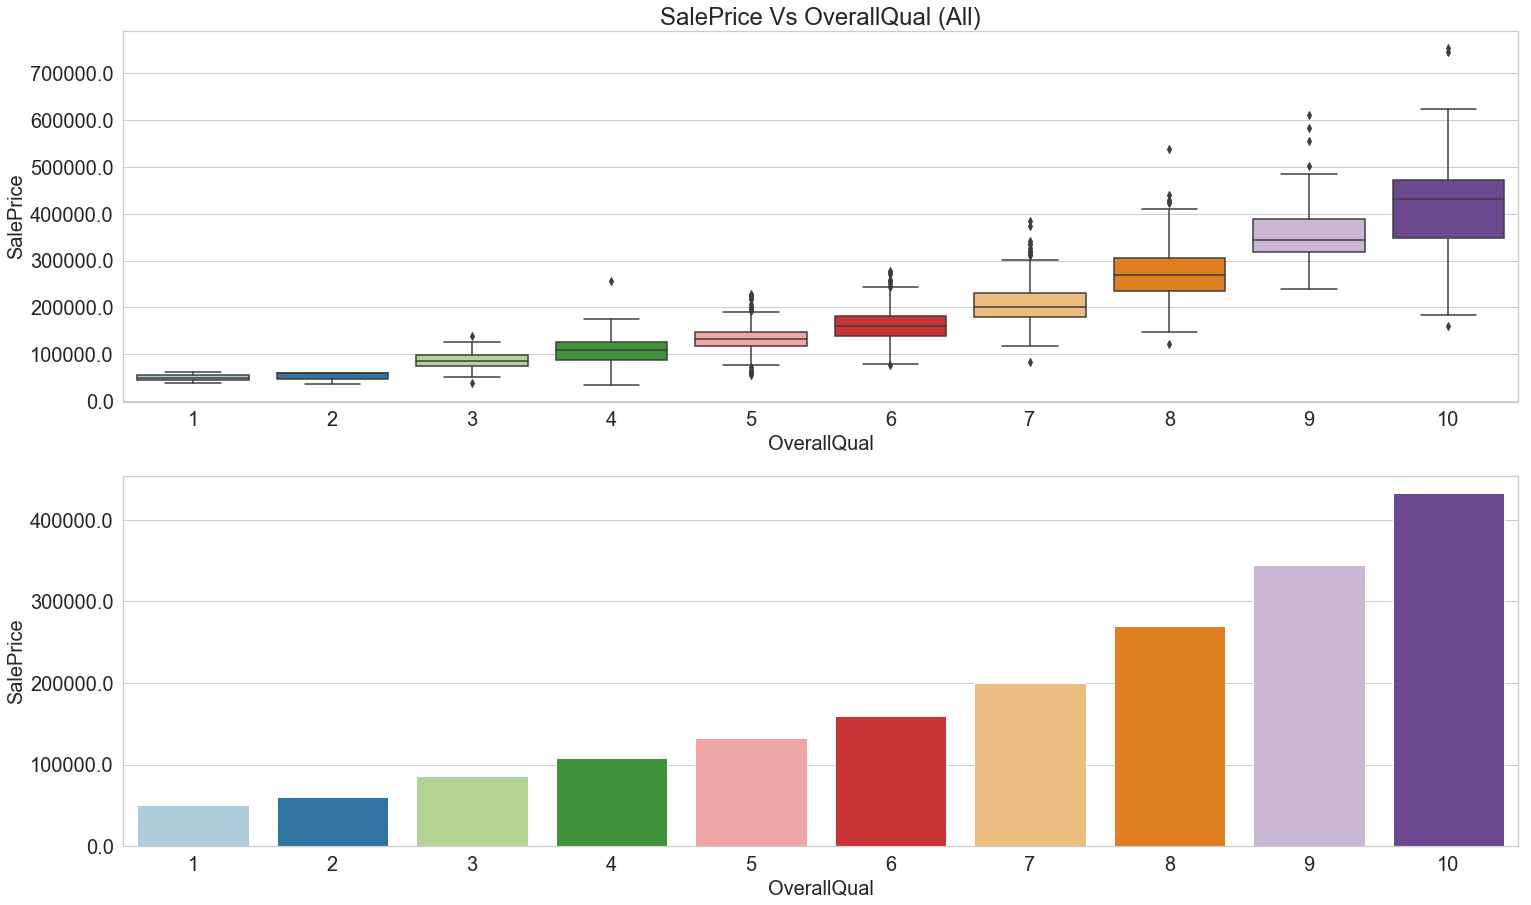

In [32]:
#Generate plots for Overall Quality attribute of housings
genPlot(df,'OverallQual',0,20,15,'All')

The plots show significant increasing trend in median housing pricing with increase in quality of housing.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

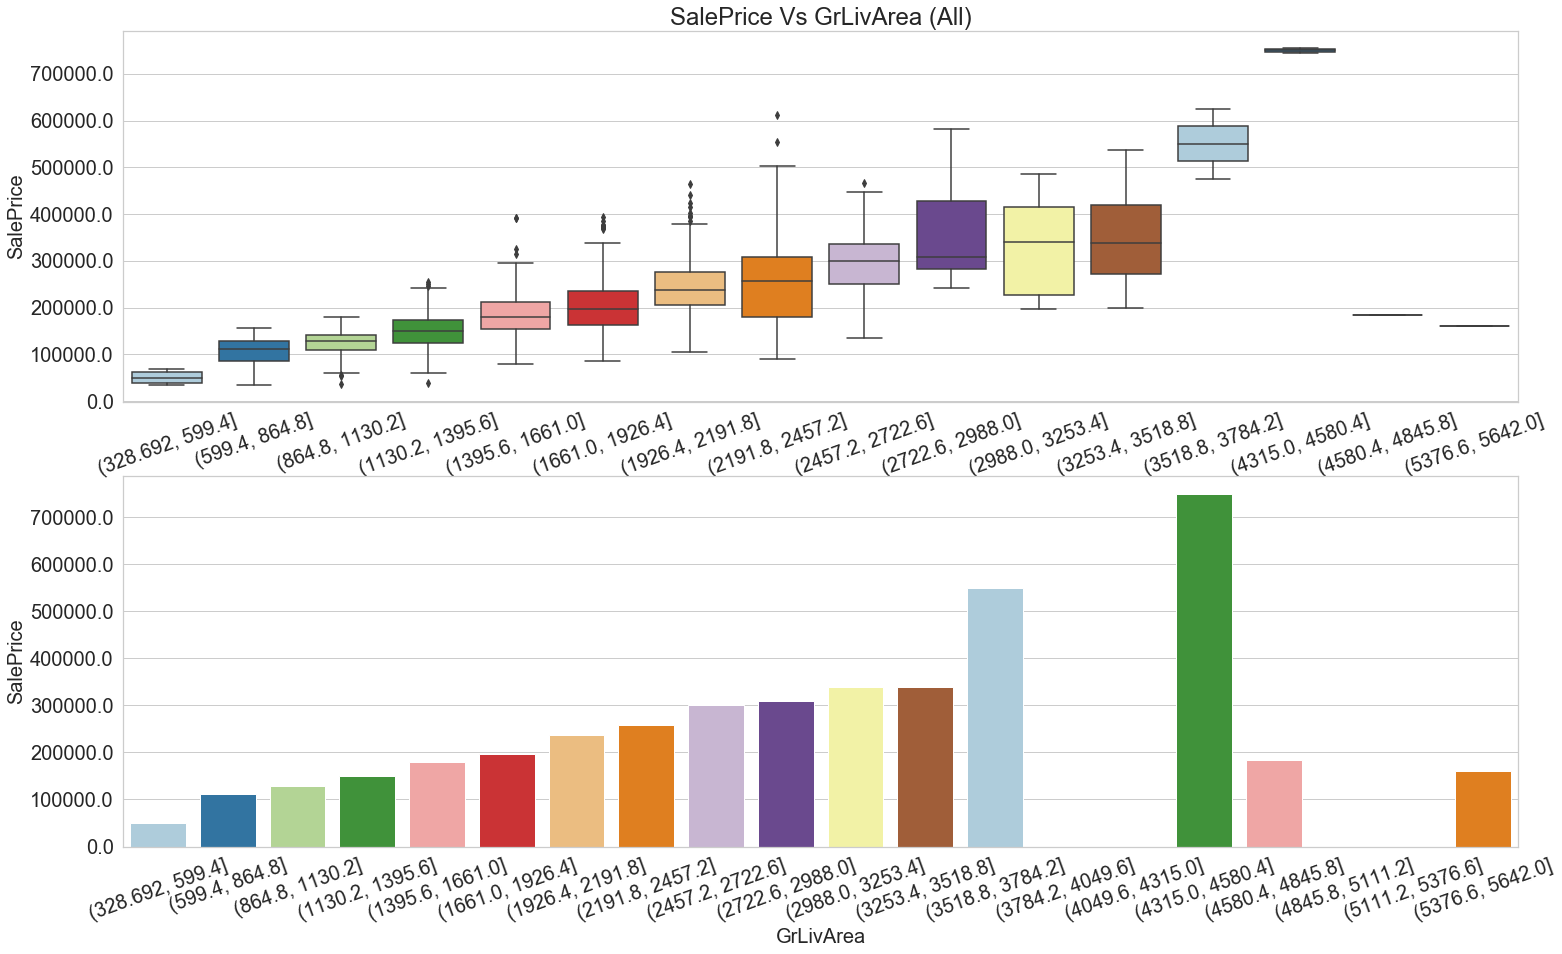

In [33]:
#Generate plots for Ground Living Area of housing attribute
genPlot(df,'GrLivArea',20,20,15,'All')

The plots show significant increasing trend in median housing pricing with higher ground living areas in the housings.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


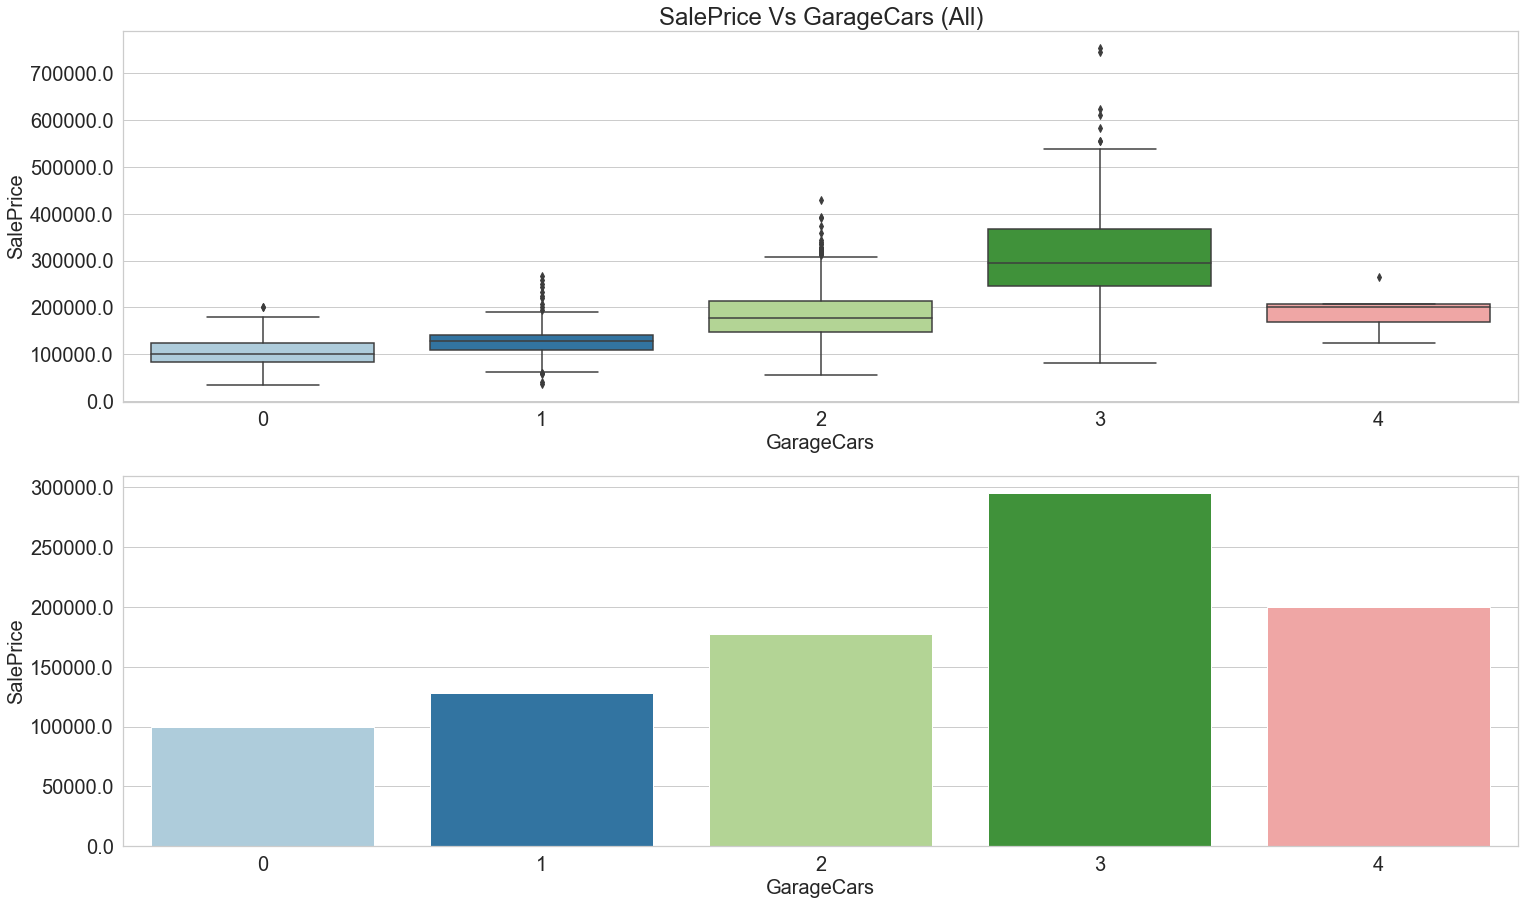

In [34]:
#Generate plots for Garage Cars Capacity of housing attribute
genPlot(df,'GarageCars',0,20,15,'All')

The plots show significant increasing trend in median housing pricing with higher availability of garage car capacity in the housings.

## Q3. Explore the top non-associated features of housing attributes with the pricing of Boston houses.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

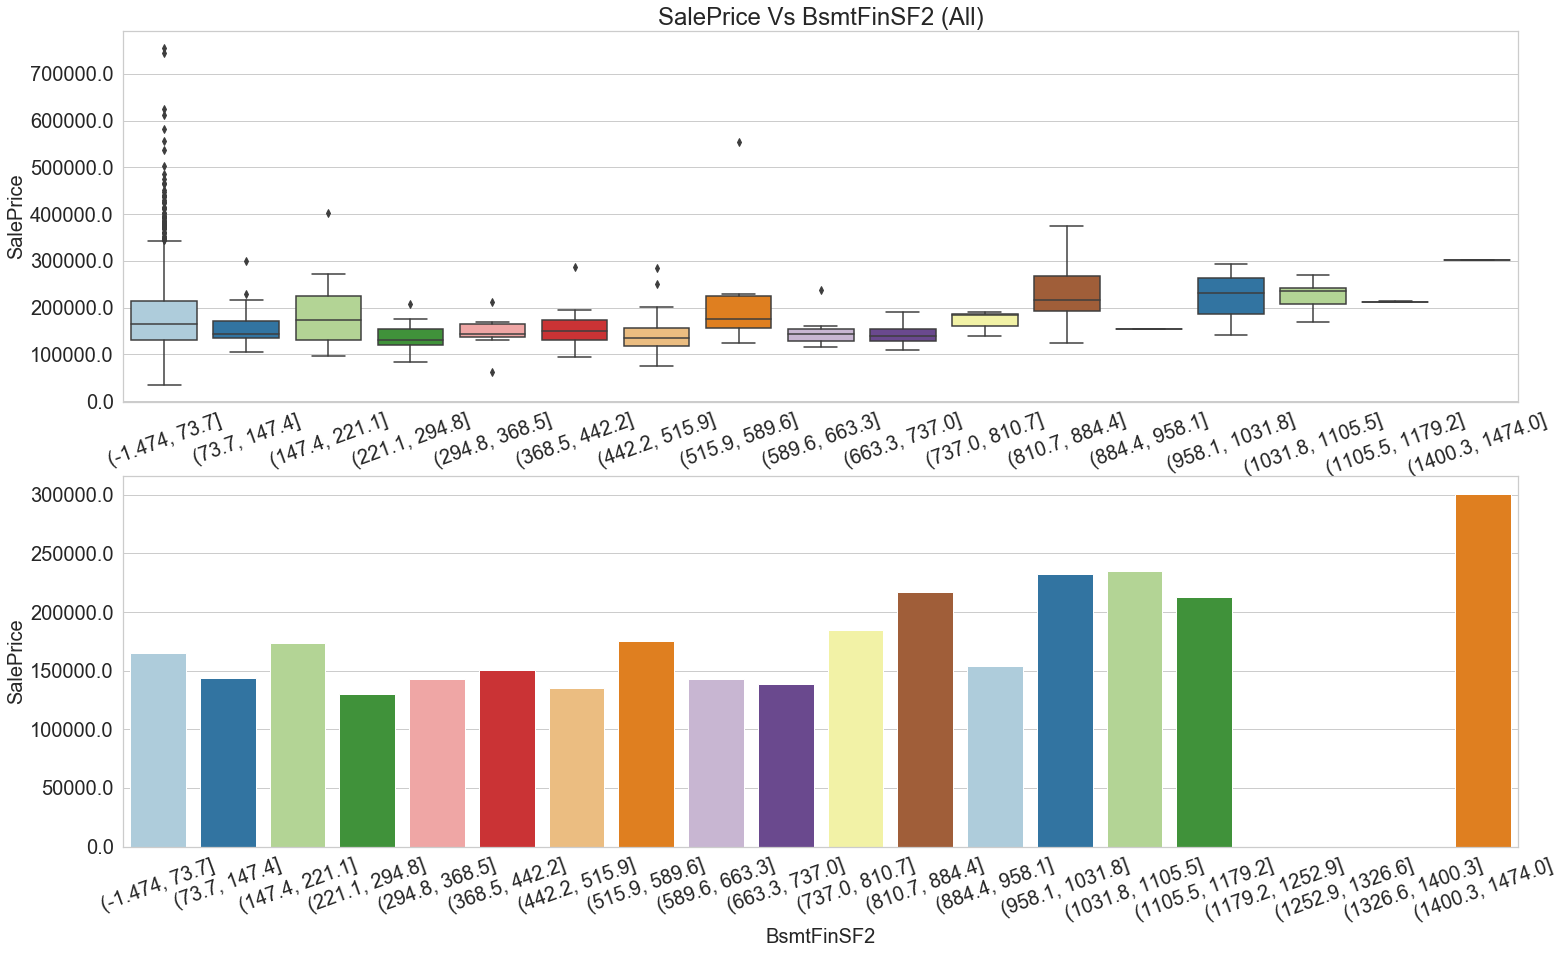

In [35]:
#Generate plots for BsmtFinSF2 housing attribute
genPlot(df,'BsmtFinSF2',20,20,15,'All')

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


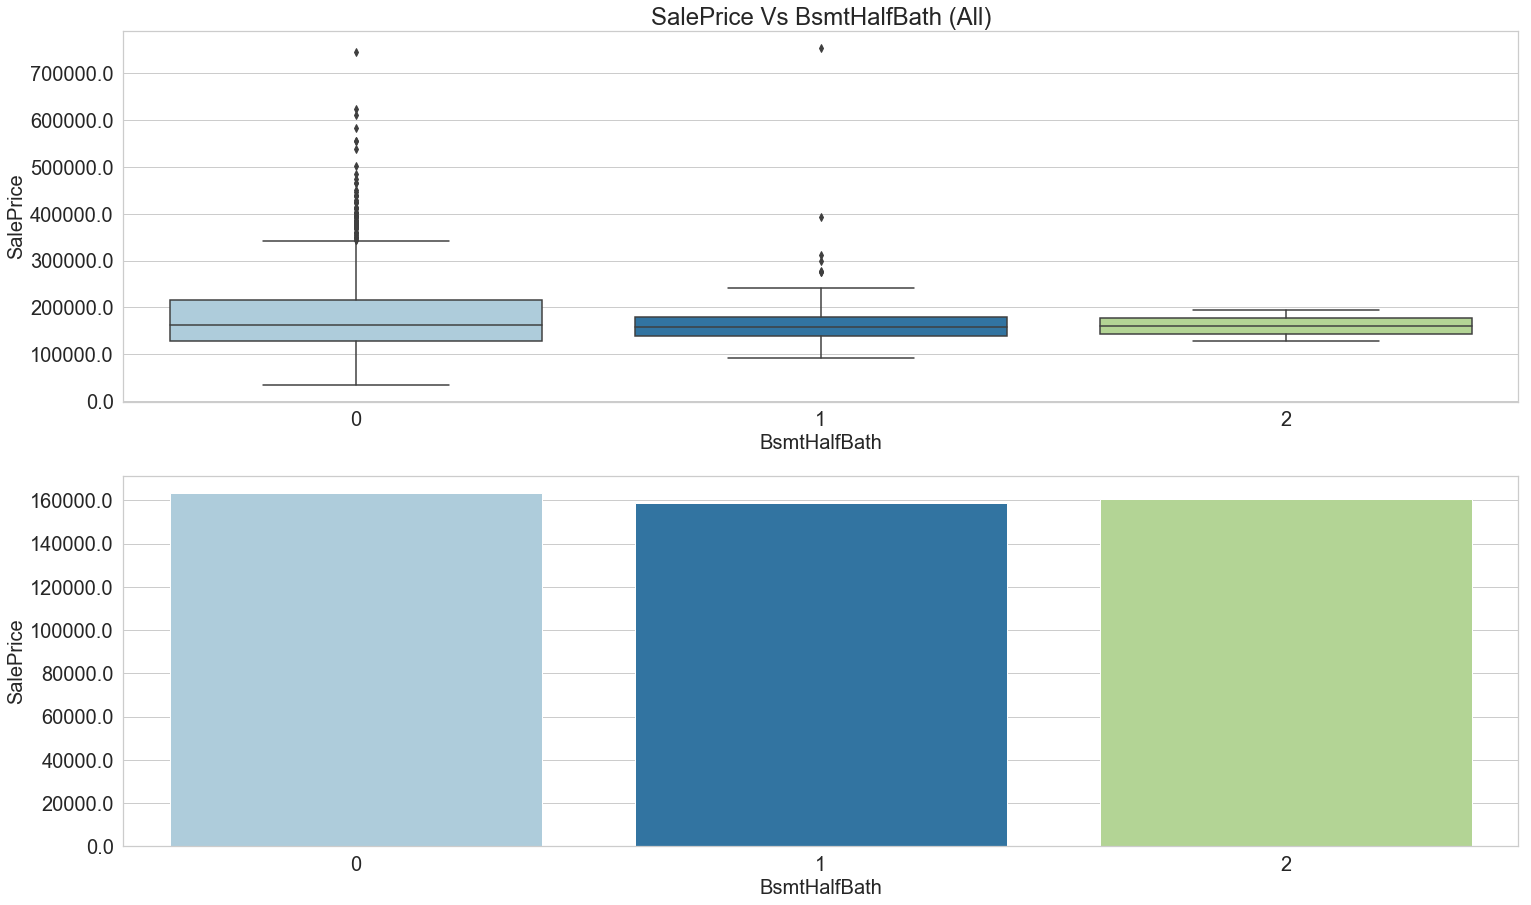

In [36]:
#Generate plots for BsmtHalfBath housing attribute
genPlot(df,'BsmtHalfBath',0,20,15,'All')

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

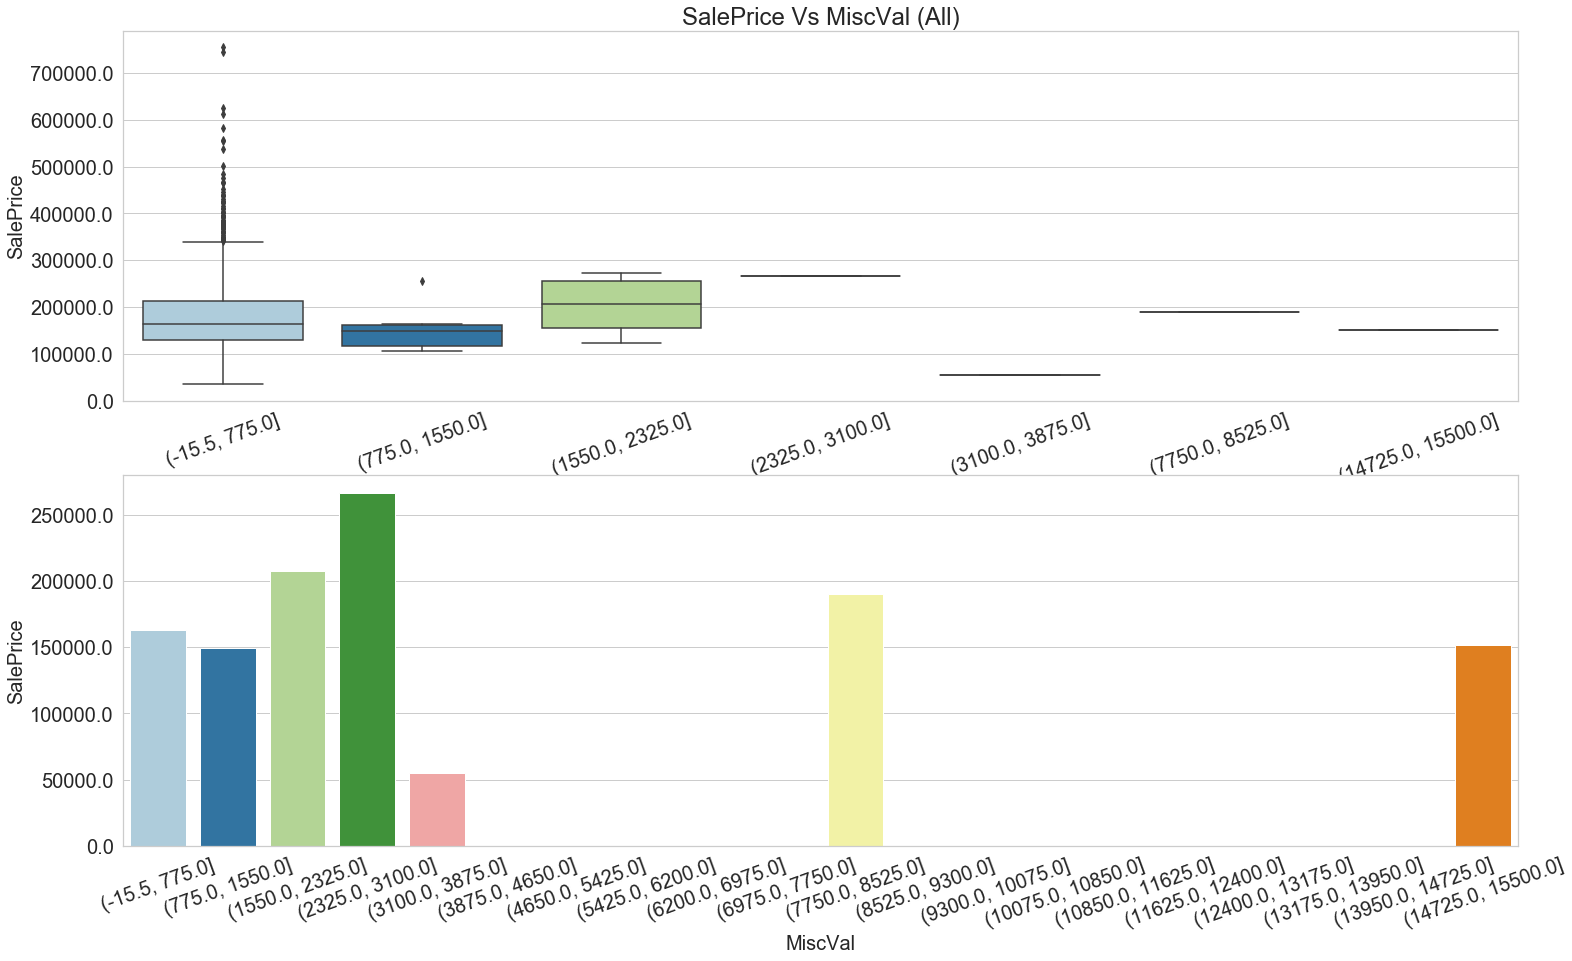

In [37]:
#Generate plots for MiscVal housing attribute
genPlot(df,'MiscVal',20,20,15,'All')

The plots clearly show no clear trend in housing pricing with the top non-associated features of housing attributes.

## Q4 For housings in the 3 categories (low, medium, high) of pricing, do they still exhibit the same relationship for the top features associated?

Defining 3 categories of housing pricing:
- Low: less than 25 percentile of housing price range
- Medium: between 20 percentile to 75 percentile of housing price range
- High: more than 75 percentile of housing price range

In [38]:
#Splitting data into pricing of 3 categories
percentile_25 = df.SalePrice.quantile(0.25)
percentile_75 = df.SalePrice.quantile(0.75)
df_25 = df[(df.SalePrice<percentile_25)]
df_25to75 = df[(df.SalePrice>=percentile_25)&(df.SalePrice<percentile_75)]
df_75 = df[(df.SalePrice>=percentile_75)]

Compare housings Overall Quality of 3 pricing categories:

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence

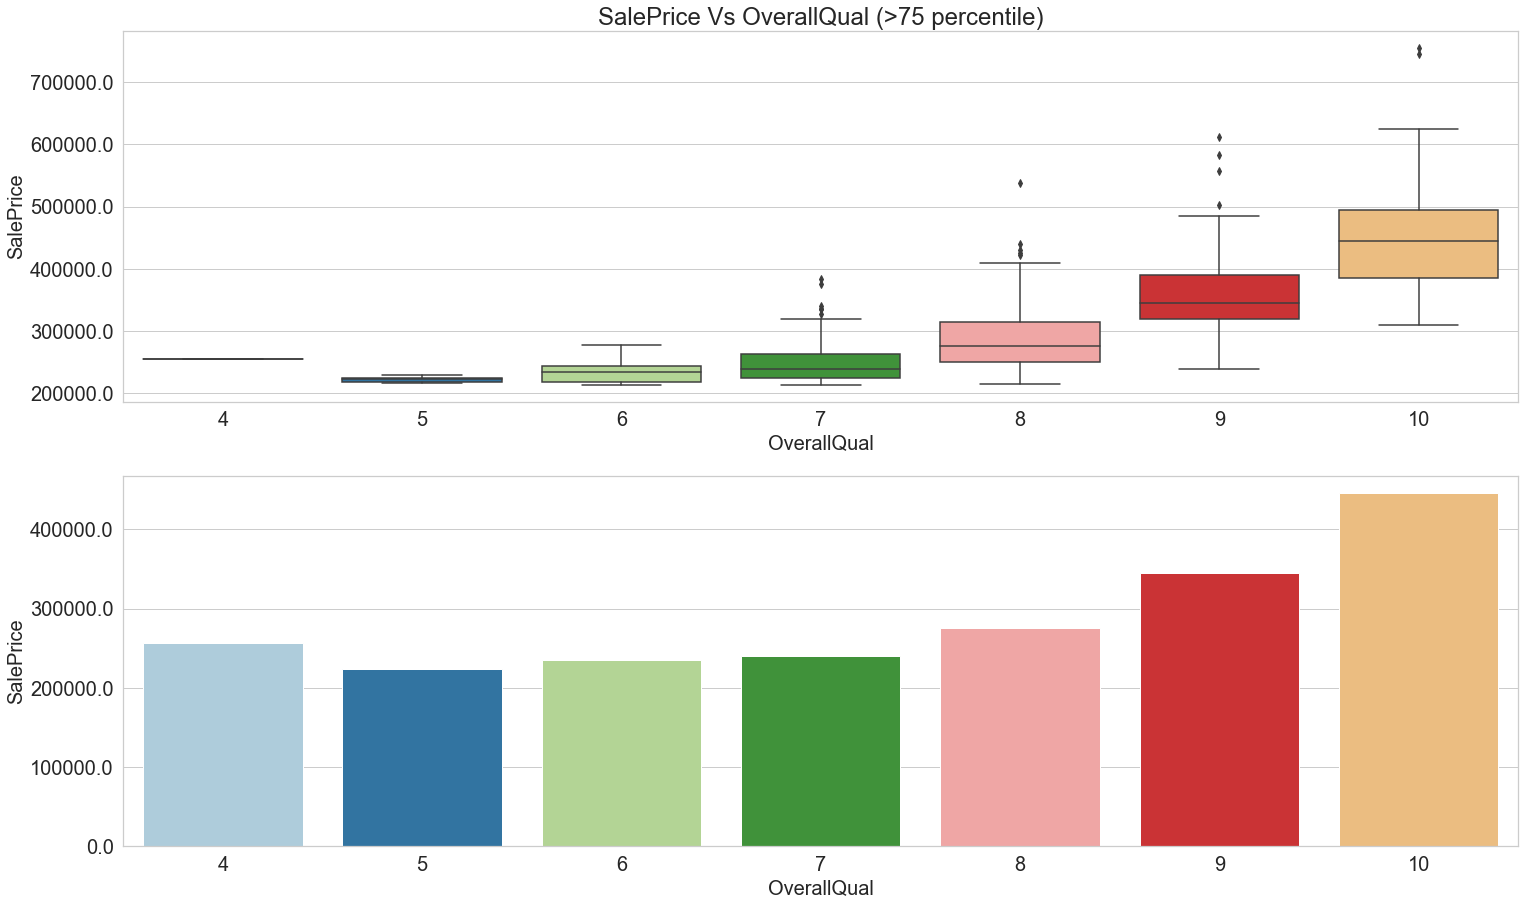

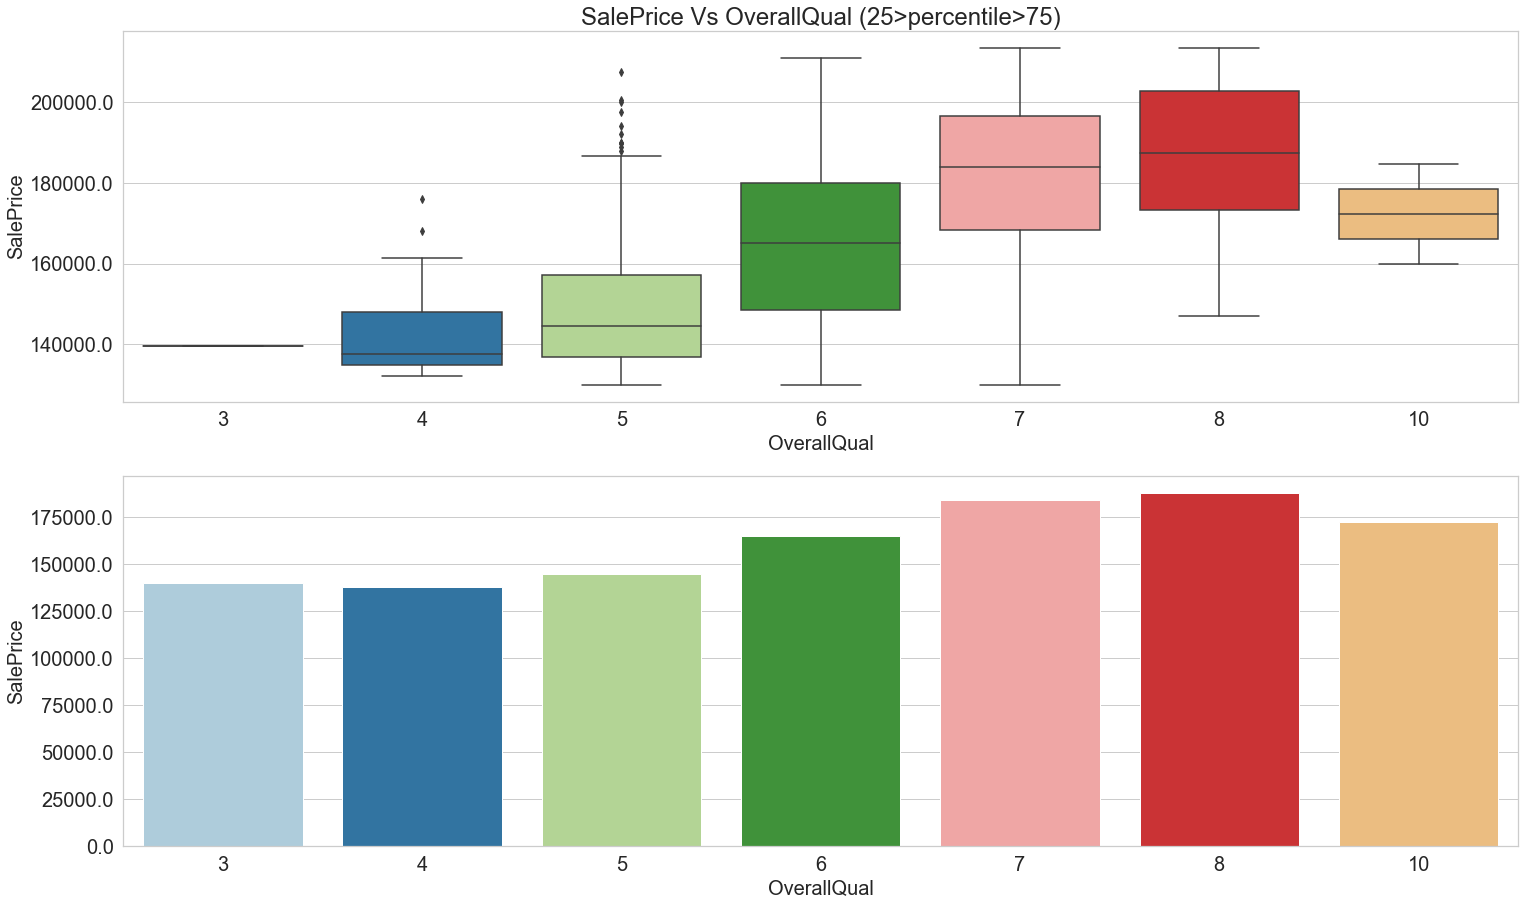

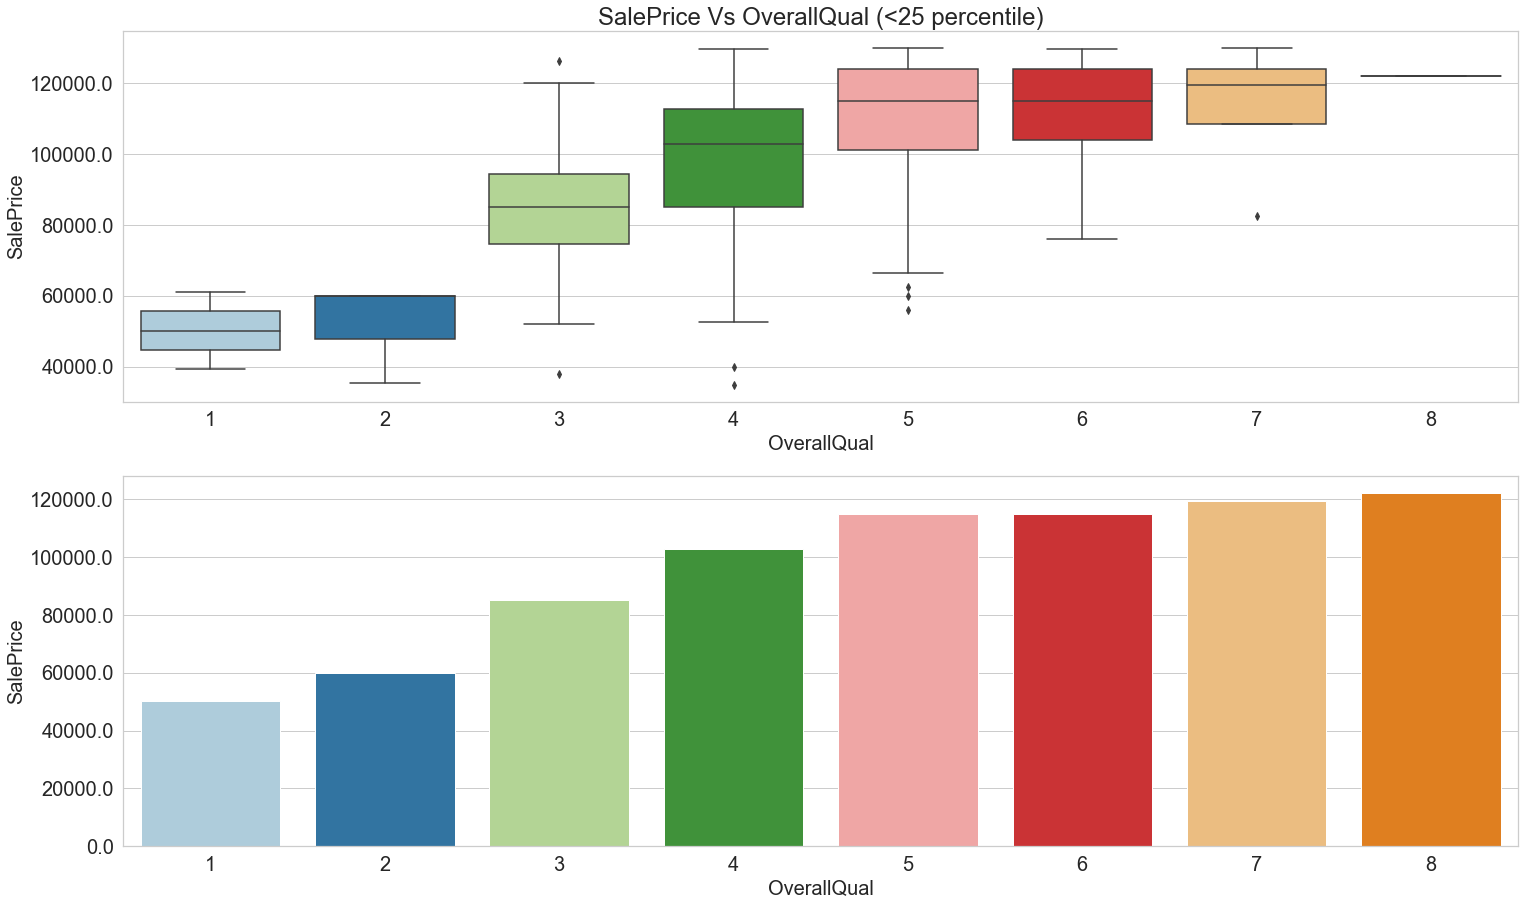

In [39]:
genPlot(df_75,'OverallQual',0,20,15,'>75 percentile')
genPlot(df_25to75,'OverallQual',0,20,15,'25>percentile>75')
genPlot(df_25,'OverallQual',0,20,15,'<25 percentile')

The comparison show significant increasing trend in median housing pricing with increase in quality of housing for each price categories.

Compare housings Ground Living Area of 3 pricing categories:

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

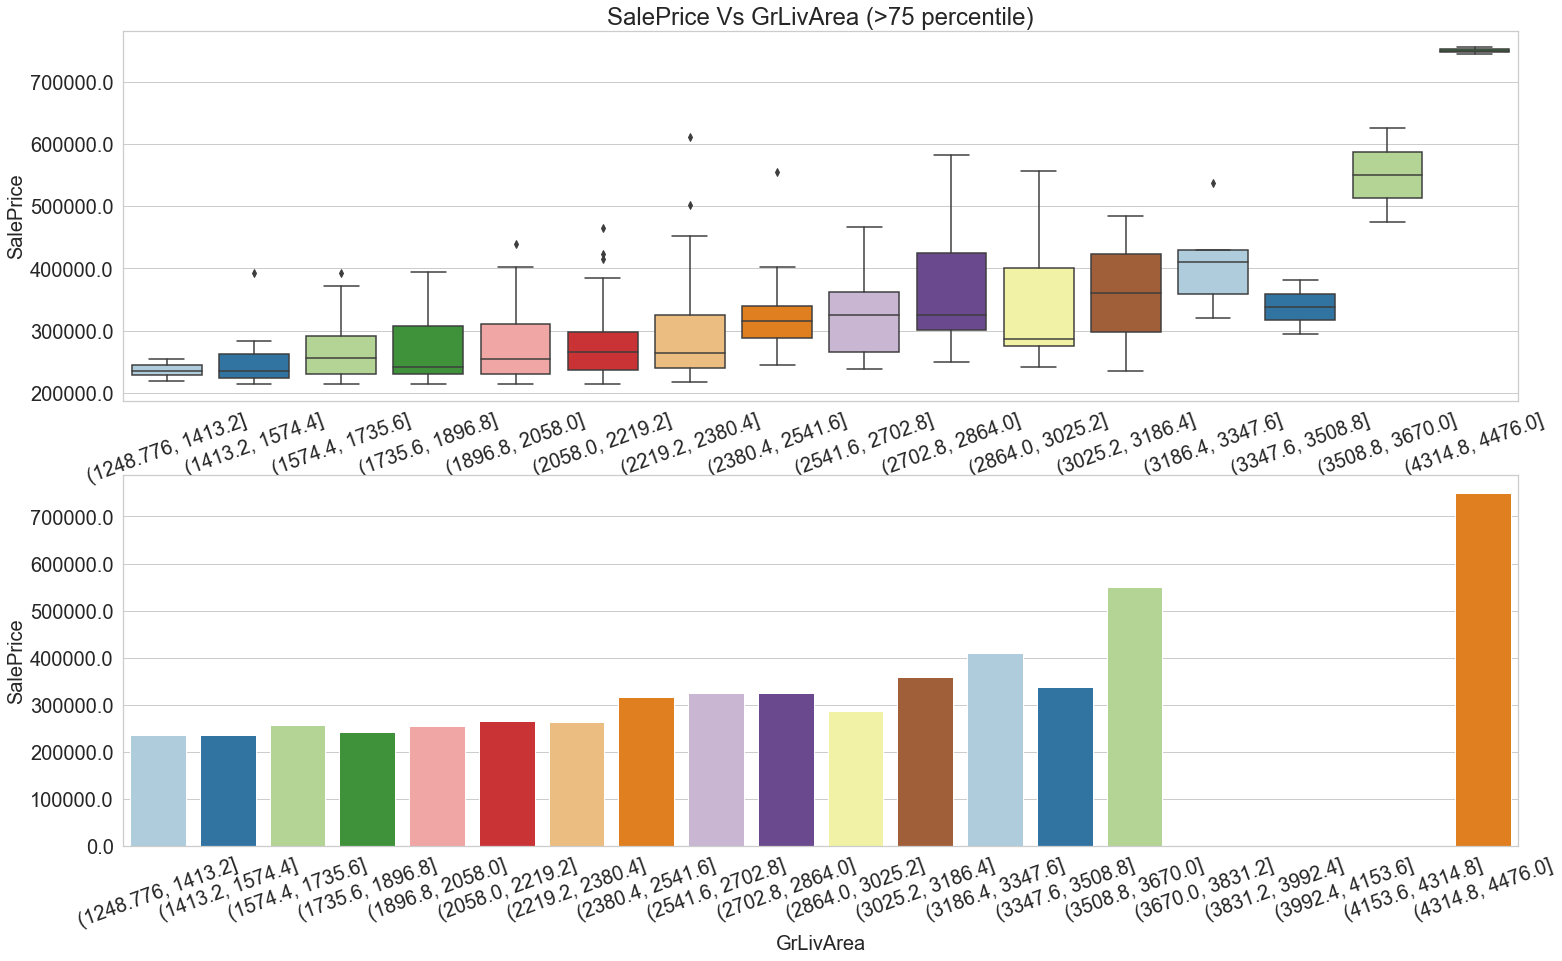

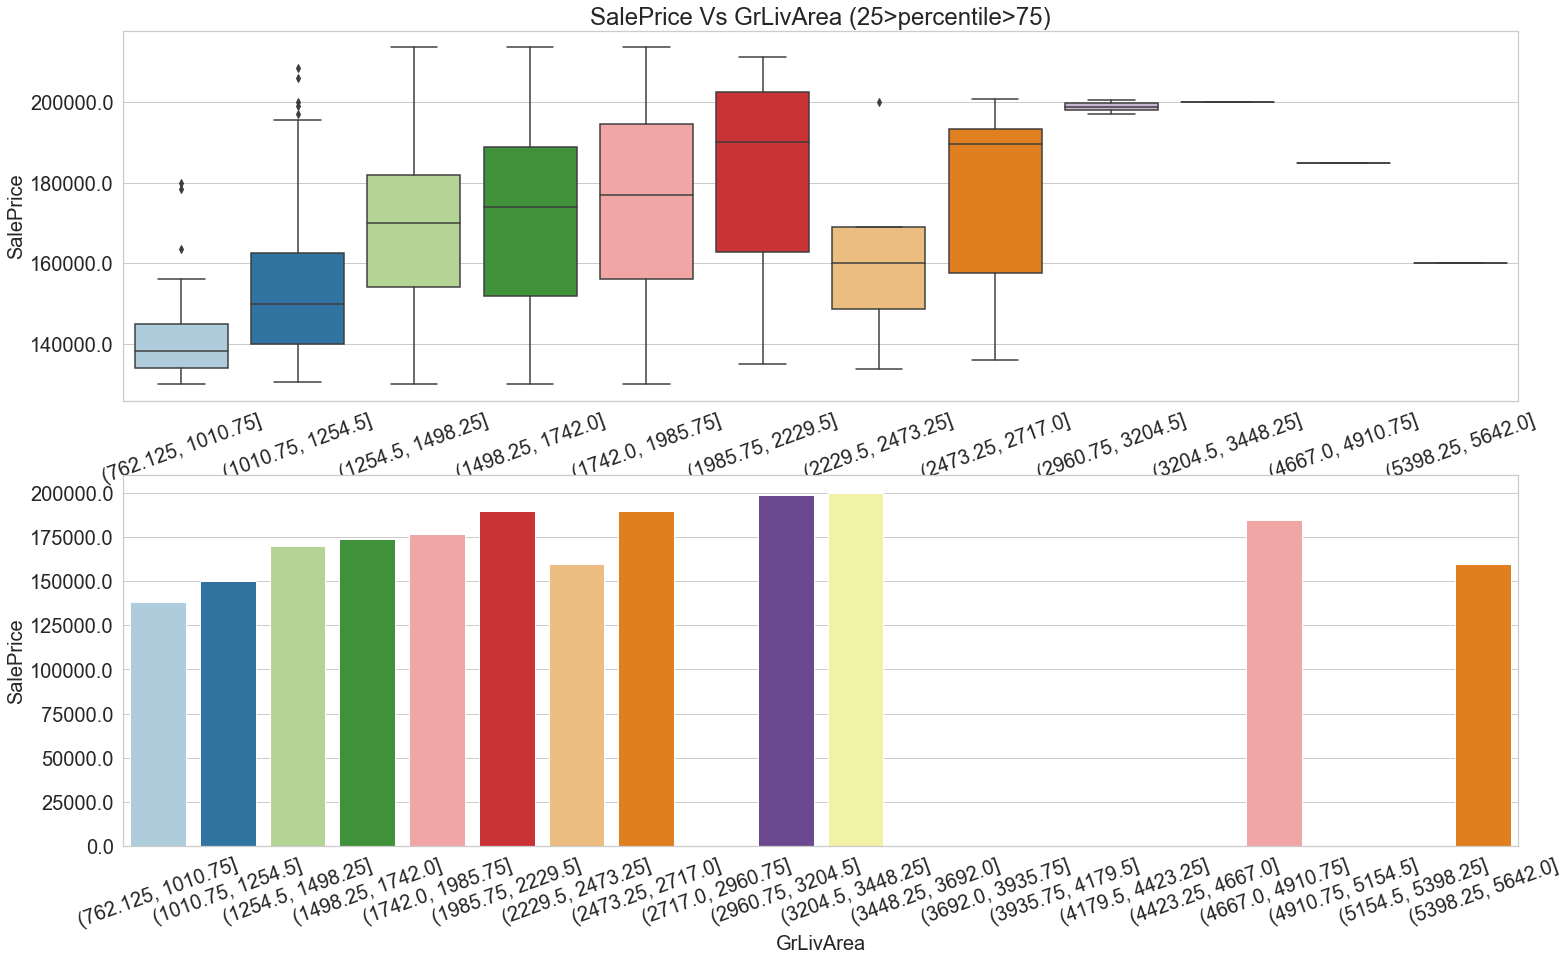

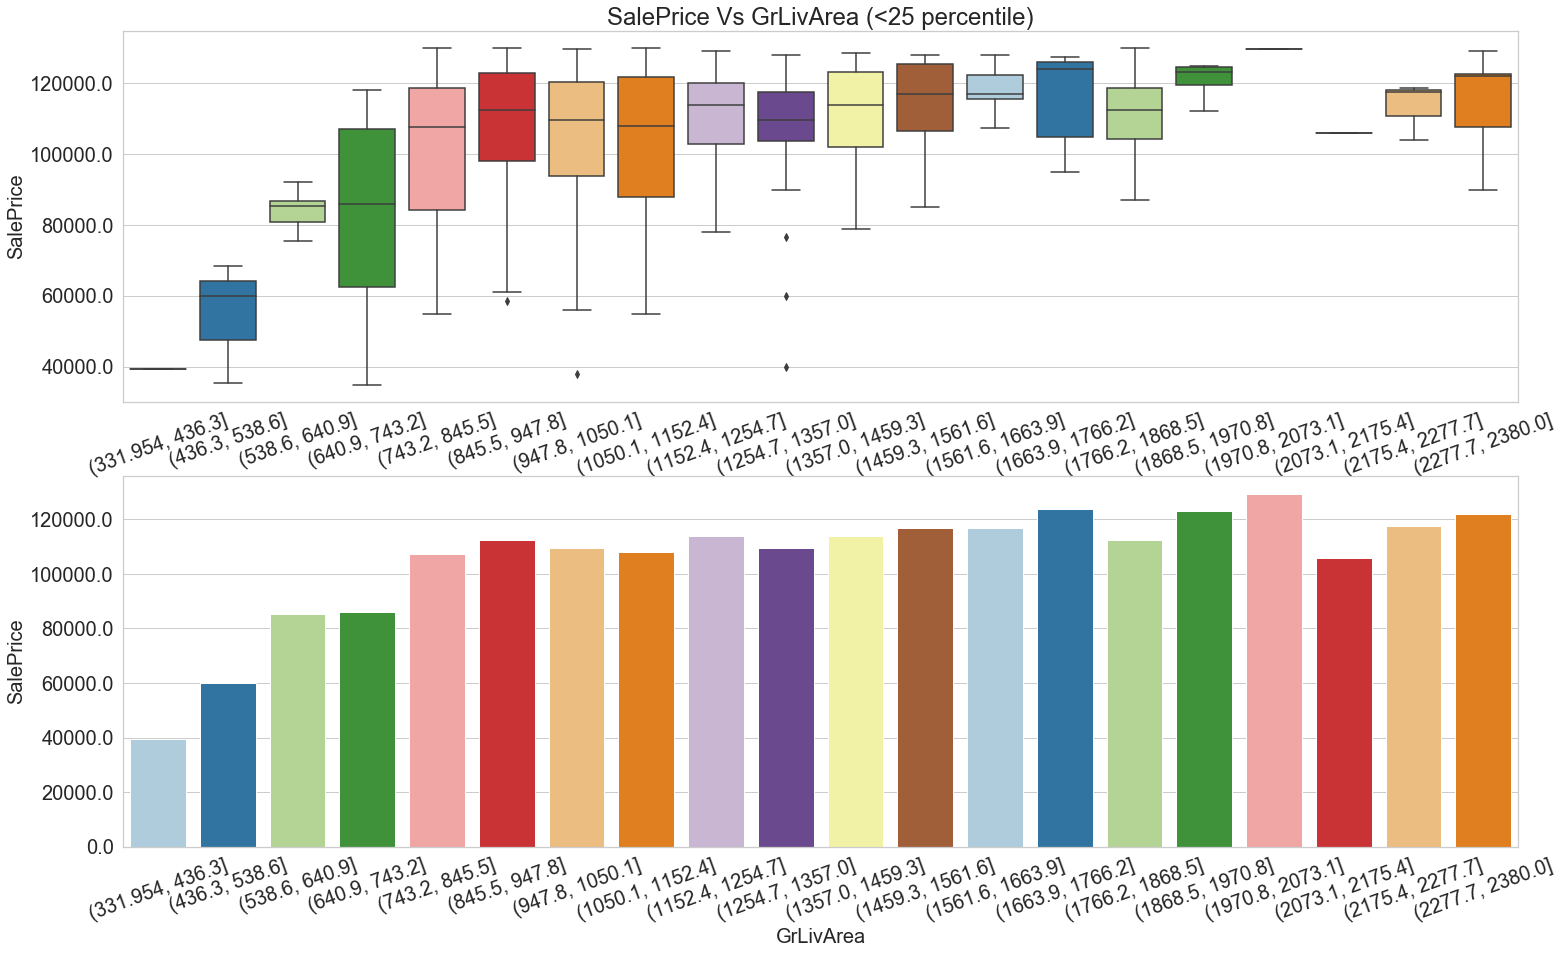

In [40]:
genPlot(df_75,'GrLivArea',20,20,15,'>75 percentile')
genPlot(df_25to75,'GrLivArea',20,20,15,'25>percentile>75')
genPlot(df_25,'GrLivArea',20,20,15,'<25 percentile')

The comparison show that for high housing price category, there is a significant trend of increasing median housing pricing with increase in ground living area. The trend is less significant with median and low house pricing categories.

Compare housings Garage Space of 3 pricing categories:

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence

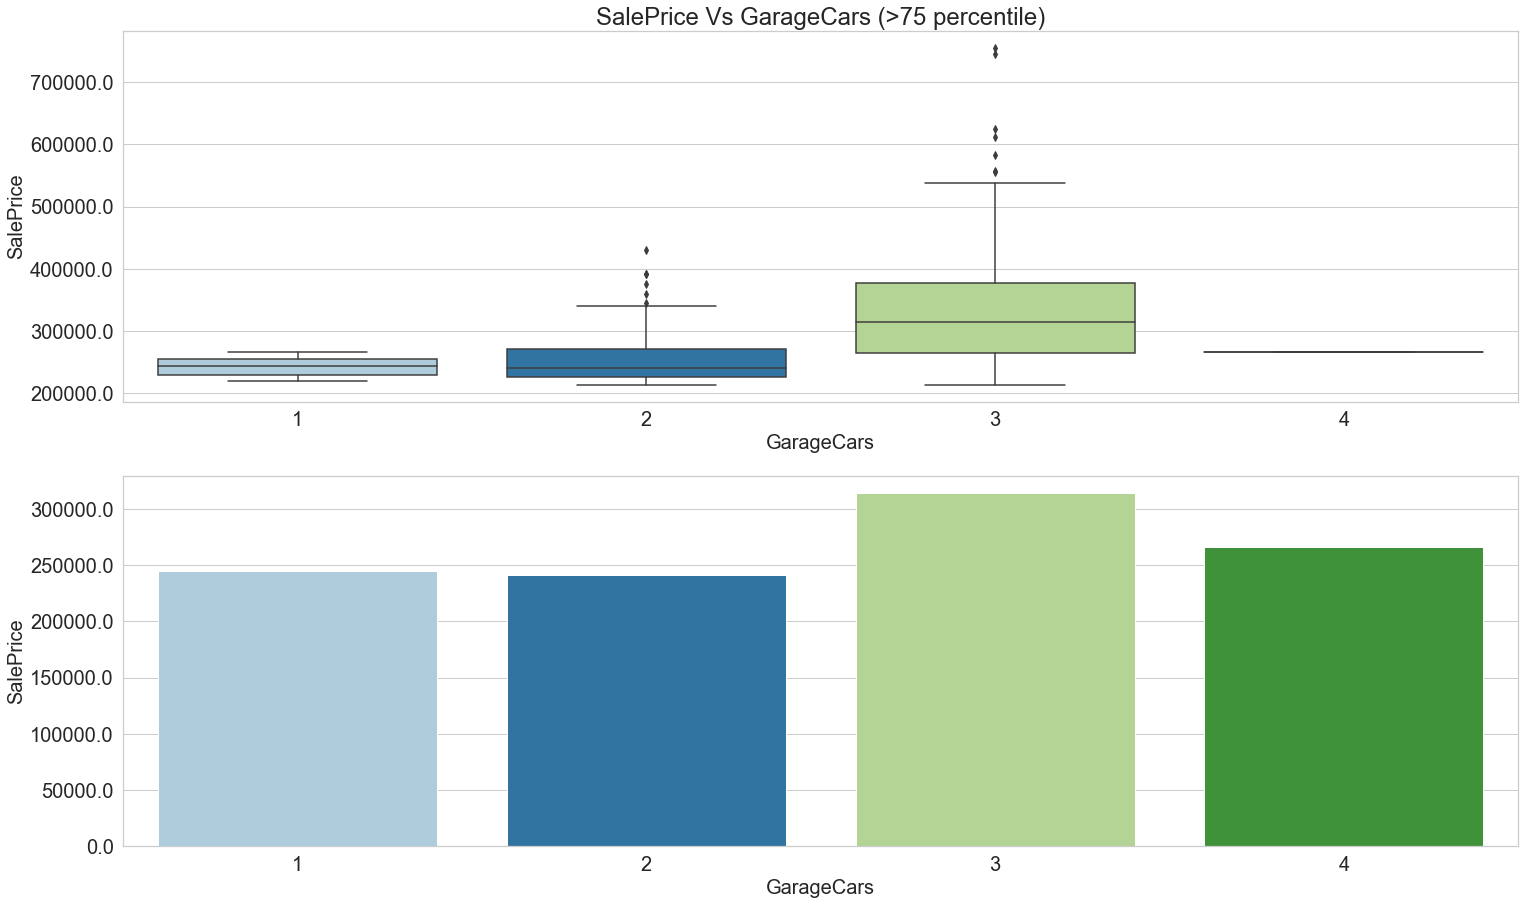

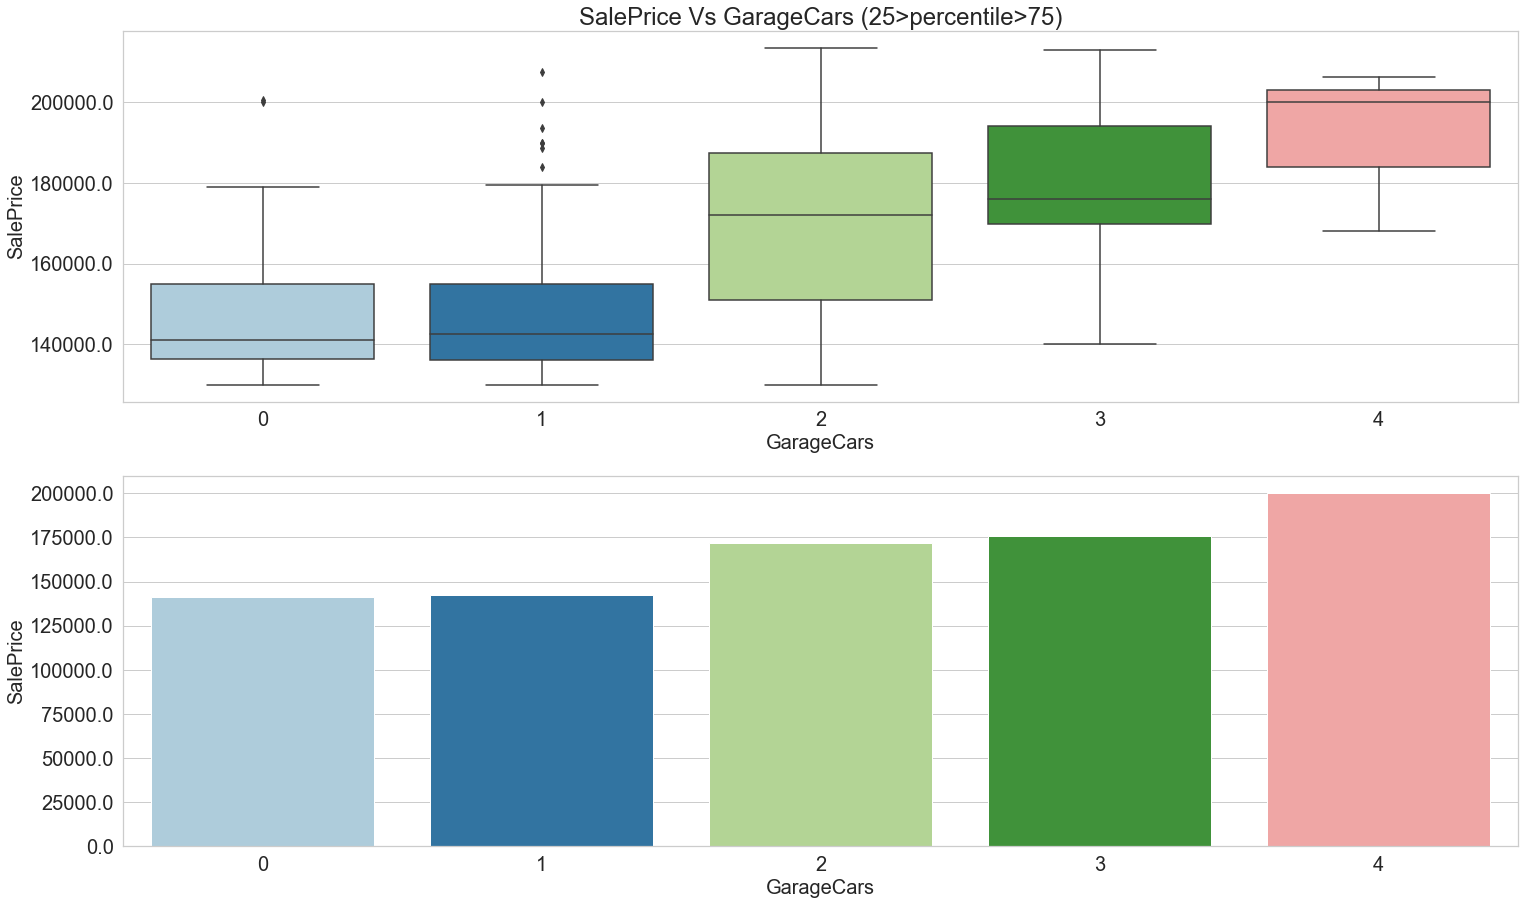

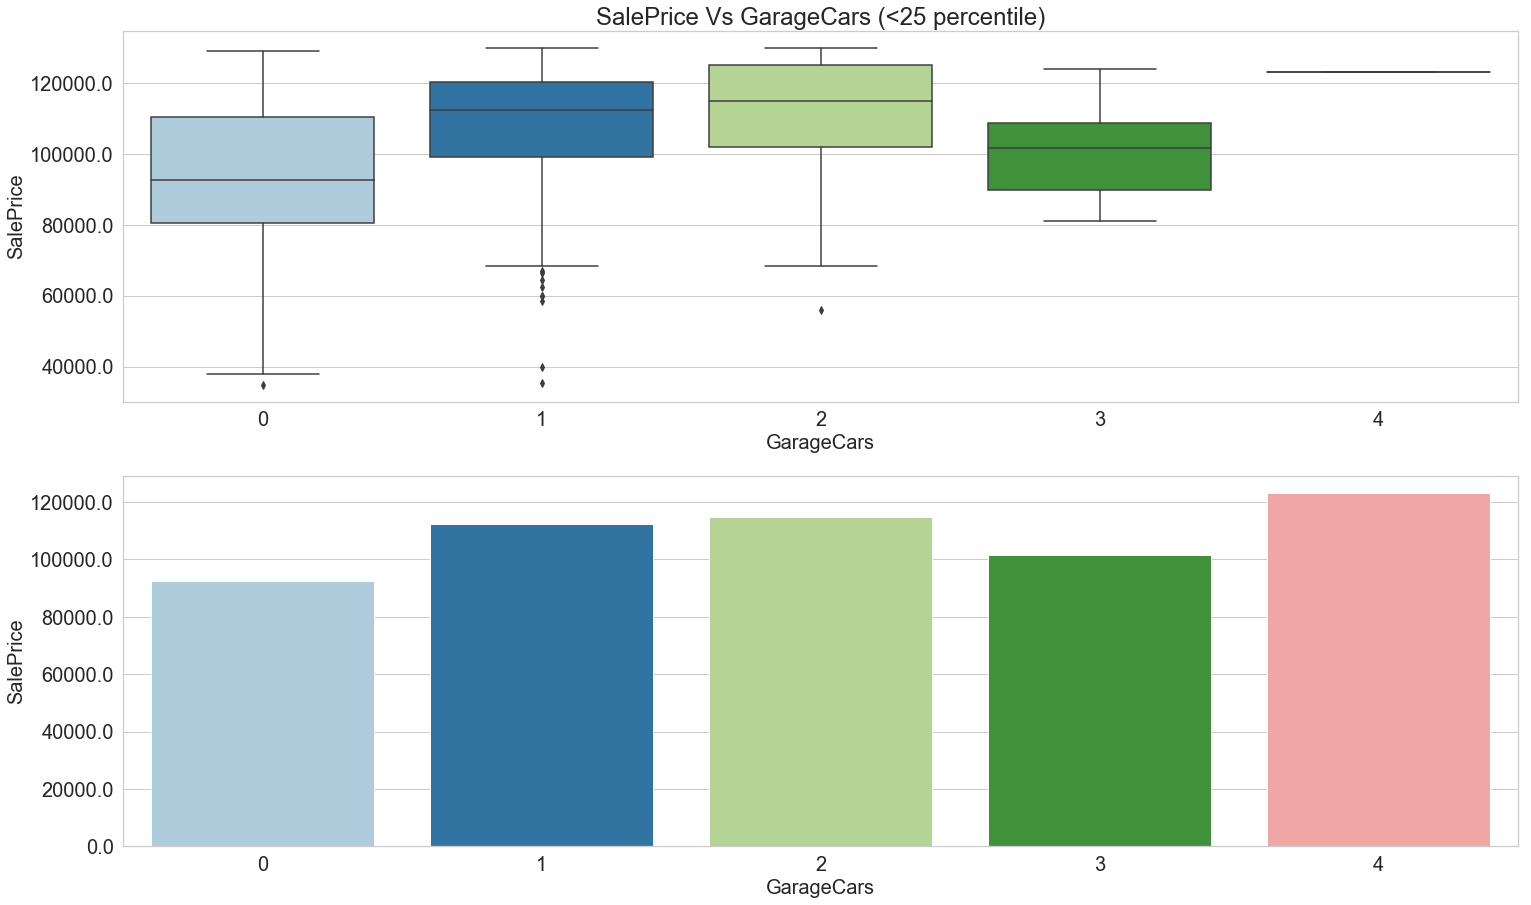

In [41]:
genPlot(df_75,'GarageCars',0,20,15,'>75 percentile')
genPlot(df_25to75,'GarageCars',0,20,15,'25>percentile>75')
genPlot(df_25,'GarageCars',0,20,15,'<25 percentile')

The comparison show that for high and medium housing price categories, there is a significant trend of increasing median housing pricing with more garage car capacity. The trend is less significant with low house pricing category.

## Conclusion

The Boston housing dataset contains housing prices with over 63 usable types of housing attributes. We wanted to explore the feasibility of using the attributes to predict pricing of houses using regression machine learning techniques. Before that, we require to identify the attributes with high association with housing prices. Out of the 63 attributes, 36 are numerical features and 29 are categorical features. By applying correlation method to housing prices, the relationship of each attribute to pricing were ranked. Then it was verified in plots of the top associated and non-associated attributes which clearly showed increasing trend with pricing for associated attribute only. It was also verified that the trend still exhibited for different price categories of housings in general. In conclusion, the selection of top associated attributes will be useful for machine learning features to predict boston housing price. 